In [1]:
#importing dependencies
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv'
dataset=pd.read_csv(url)

In [3]:
dataset.shape

(1000, 40)

size of the dataset is small

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
#dropping the column as the whole column is null
dataset.drop(columns=['_c39'],inplace=True)

In [6]:
pd.set_option('display.max_columns',None)
dataset.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [7]:
# count of each unique element in each column
dataset.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [8]:
#dropping these columns as they are unique for each and every individual 
dataset.drop(columns=['policy_number','insured_zip','incident_location'],inplace=True)

In [9]:
dataset.nunique()

months_as_customer             391
age                             46
policy_bind_date               951
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_available          3
total_claim_amount  

In [10]:
dataset.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [11]:
# count of each unique element repeated in that paritcular column
for i in dataset:
    print(dataset[i].value_counts(),'\n\n')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64 


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64 


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64 


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 


250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64 


1000    351
500     342
2000

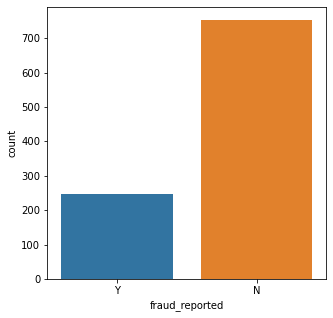

In [12]:
    plt.figure(figsize = (5,5))
    ax=sns.countplot('fraud_reported',data=dataset)
    plt.show()

Dataset is imbalanced

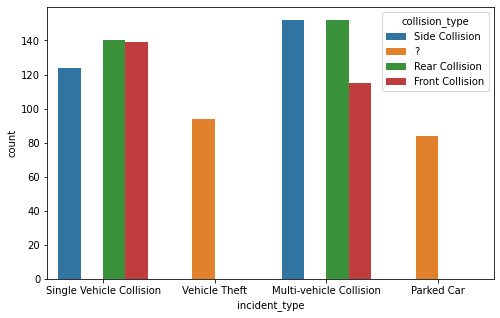

In [13]:
plt.figure(figsize = (8,5))
ax=sns.countplot(x='incident_type',hue='collision_type',data=dataset)
plt.show()

In [14]:
dataset['collision_type'].replace('?','No Collision',inplace=True)
dataset['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
No Collision       178
Name: collision_type, dtype: int64

In [15]:
property_set=[]
for i in dataset['property_claim']:
    if i > 0:
        property_set.append('Yes')
    else:
        property_set.append('No')

In [16]:
ps=pd.DataFrame(property_set)
ps.value_counts()

Yes    981
No      19
dtype: int64

In [17]:
ps.columns=['P_claimed']

In [18]:
trial_set=pd.concat([dataset,ps],axis=1)

In [19]:
trial_set.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,P_claimed
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,Yes
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,No Collision,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,Yes
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,Yes
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Yes
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,No Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,Yes


Few columns have question mark elements , so replacing those question with ideal element accordingly

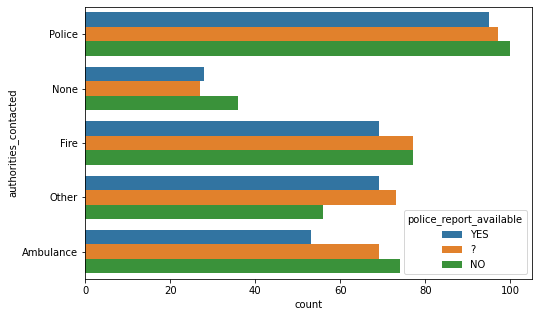

In [20]:
plt.figure(figsize = (8,5))
ax=sns.countplot(y='authorities_contacted',hue='police_report_available',data=trial_set)
plt.show()

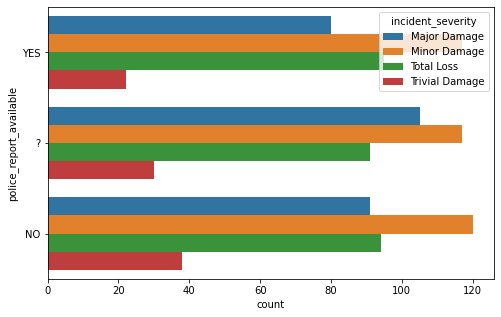

In [21]:
plt.figure(figsize = (8,5))
ax=sns.countplot(y='police_report_available',hue='incident_severity',data=trial_set)
plt.show()

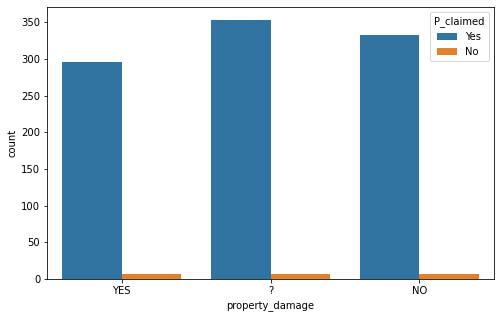

In [22]:
plt.figure(figsize = (8,5))
ax=sns.countplot(x='property_damage',hue='P_claimed',data=trial_set)
plt.show()

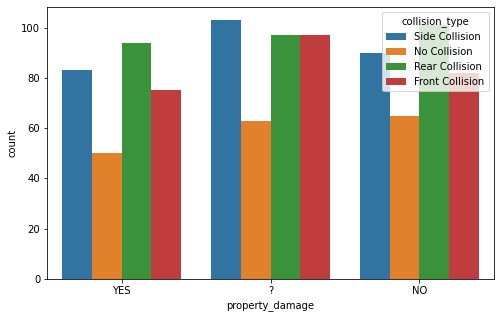

In [23]:
plt.figure(figsize = (8,5))
ax=sns.countplot(x='property_damage',hue='collision_type',data=trial_set)
plt.show()

In [24]:
x=dataset['property_damage'].isin(['?'])

In [25]:
x.value_counts()

False    640
True     360
Name: property_damage, dtype: int64

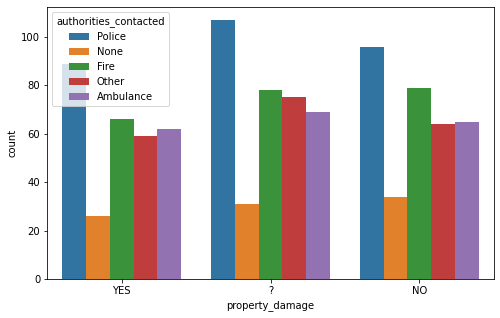

In [26]:
plt.figure(figsize = (8,5))
ax=sns.countplot(x='property_damage',hue='authorities_contacted',data=trial_set)
plt.show()

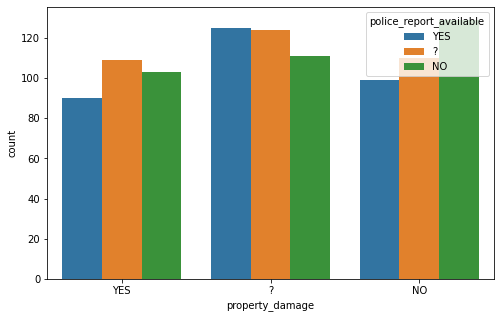

In [27]:
plt.figure(figsize = (8,5))
ax=sns.countplot(x='property_damage',hue='police_report_available',data=trial_set)
plt.show()

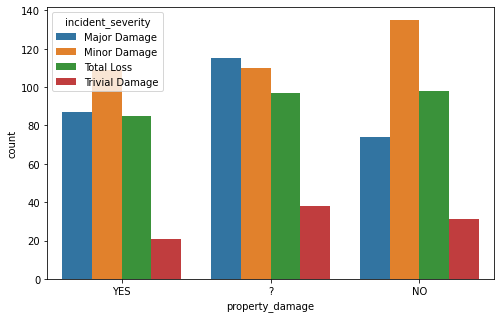

In [28]:
plt.figure(figsize = (8,5))
ax=sns.countplot(x='property_damage',hue='incident_severity',data=trial_set)
plt.show()

based on the bi-variate analysis and general knowledge there no need of a police report for minor and trivial damage , and property damage happens only in major or total damage incidents

In [29]:
#dividing into 4 different dataset and replacing the ? element
major_d=dataset[(dataset.incident_severity=='Major Damage')]
total_d=dataset[(dataset.incident_severity=='Total Loss')]
minor_d=dataset[(dataset.incident_severity=='Minor Damage')]
trivial_d=dataset[(dataset.incident_severity=='Trivial Damage')]

In [30]:
major_d.property_damage.value_counts()

?      115
YES     87
NO      74
Name: property_damage, dtype: int64

In [31]:
minor_d.property_damage.value_counts()

NO     135
?      110
YES    109
Name: property_damage, dtype: int64

In [32]:
total_d.property_damage.value_counts()

NO     98
?      97
YES    85
Name: property_damage, dtype: int64

In [33]:
major_d.property_damage.replace('?','YES',inplace=True)
total_d.property_damage.replace('?','YES',inplace=True)
minor_d.property_damage.replace('?','NO',inplace=True)
trivial_d.property_damage.replace('?','NO',inplace=True)

In [34]:
major_d.police_report_available.replace('?','YES',inplace=True)
total_d.police_report_available.replace('?','YES',inplace=True)
minor_d.police_report_available.replace('?','NO',inplace=True)
trivial_d.police_report_available.replace('?','NO',inplace=True)

In [35]:
frame=[major_d,total_d,minor_d,trivial_d]
new_set=pd.concat(frame)
new_set=new_set.sort_index()

In [36]:
new_set.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,No Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,YES,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,No Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [37]:
new_set.property_damage.value_counts()

YES    514
NO     486
Name: property_damage, dtype: int64

In [38]:
new_set.police_report_available.value_counts()

YES    510
NO     490
Name: police_report_available, dtype: int64

In [39]:
#splitting the date into 3 columns i.e. day, month and year 
new_set[['policy_day','policy_month','policy_year']]=new_set['policy_bind_date'].str.split('-',expand=True)
new_set[['incident_day','incident_month','incident_year']]=new_set['incident_date'].str.split('-',expand=True)
new_set.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_day,policy_month,policy_year,incident_day,incident_month,incident_year
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,01,2015
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,No Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,27,06,2006,21,01,2015
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,06,09,2000,22,02,2015
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,YES,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,05,1990,10,01,2015
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,No Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,06,06,2014,17,02,2015


In [40]:
#converting object data found in numerical form to integer type
new_set.drop(columns=['incident_year','policy_bind_date','incident_date'],inplace=True)
new_set['policy_day']=pd.to_numeric(new_set['policy_day'])
new_set['policy_month']=pd.to_numeric(new_set['policy_month'])
new_set['policy_year']=pd.to_numeric(new_set['policy_year'])
new_set['incident_day']=pd.to_numeric(new_set['incident_day'])
new_set['incident_month']=pd.to_numeric(new_set['incident_month'])
new_set.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [41]:
#setting age in 3 categories i.e. youngster 0, bachelors-1 and elders -3
new_set.loc[new_set['age'].between(18,29),'age']=0
new_set.loc[new_set['age'].between(30,49),'age']=1
new_set.loc[new_set['age'].between(50,70),'age']=2

In [42]:
# setting incident hour into 5 types midnight 12am -3am ~ 0
# early morning 4am - 7am ~ 1
# mid day 8am - 4pm ~2
# evening 5pm - 7pm ~ 3
# night 8pm - 11pm ~ 4
new_set.loc[new_set['incident_hour_of_the_day'].between(0,3),'incident_hour_of_the_day']=0
new_set.loc[new_set['incident_hour_of_the_day'].between(4,7),'incident_hour_of_the_day']=1
new_set.loc[new_set['incident_hour_of_the_day'].between(8,16),'incident_hour_of_the_day']=2
new_set.loc[new_set['incident_hour_of_the_day'].between(17,19),'incident_hour_of_the_day']=3
new_set.loc[new_set['incident_hour_of_the_day'].between(20,23),'incident_hour_of_the_day']=4

In [43]:
new_set.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_day,policy_month,policy_year,incident_day,incident_month
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,0.972000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,1.972000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,15.448000,6.559000,2001.604000,14.995000,1.496000
std,115.113174,0.530563,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,1.272334,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,8.808001,3.499824,7.360391,8.670995,0.523697
min,0.000000,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,1.000000,1.000000,1990.000000,1.000000,1.000000
25%,115.750000,1.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,1.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,8.000000,3.000000,1995.000000,7.750000,1.000000
50%,199.500000,1.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,2.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,16.000000,7.000000,2002.000000,15.000000,1.000000
75%,276.250000,1.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,3.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,23.000000,10.000000,2008.000000,22.000000,2.000000
max,479.000000,2.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,4.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,31.000000,12.000000,2015.000000,31.000000,3.000000


In [44]:
# as we already have the total claim converting injury , property and vehicle claim to yes or no category with 0 and 1
new_set.loc[new_set['injury_claim'].between(1,100000),'injury_claim']=1
new_set.loc[new_set['property_claim'].between(1,100000),'property_claim']=1
new_set.loc[new_set['vehicle_claim'].between(1,100000),'vehicle_claim']=1

In [45]:
# count of each unique element repeated in that paritcular column
for i in new_set:
    print(new_set[i].value_counts(),'\n\n')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64 


1    718
0    155
2    127
Name: age, dtype: int64 


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 


250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64 


1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64 


1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64 


 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64 


FEMALE    537
MALE      463
Name: insured_sex, dtype: int64 


JD             161
High School    160
Associate      145
MD             144
Ma

In [46]:
visual_set=new_set.drop(columns=['total_claim_amount','months_as_customer','policy_annual_premium','auto_make','capital-gains','insured_occupation','insured_hobbies','capital-loss','auto_year','auto_model','policy_day','policy_year'])

age


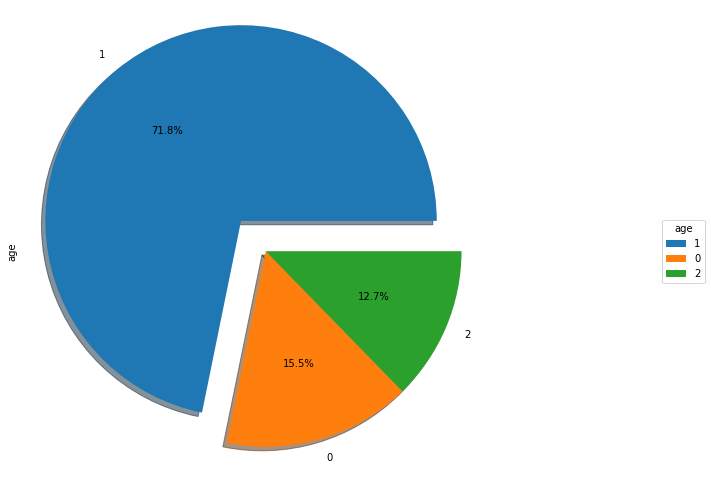




policy_state


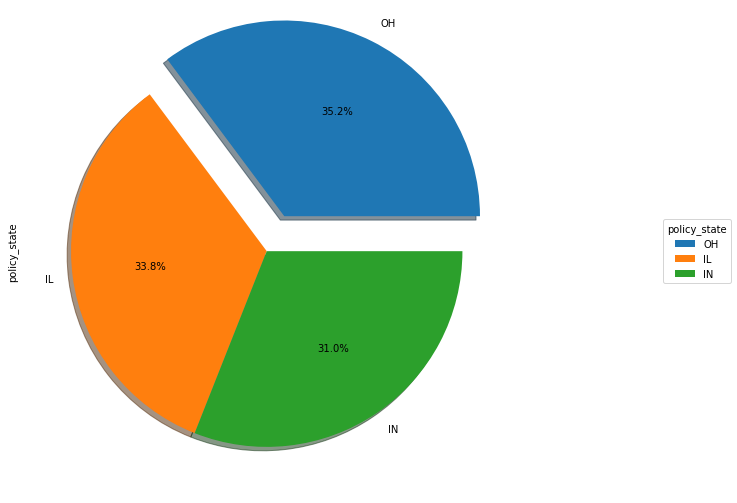




policy_csl


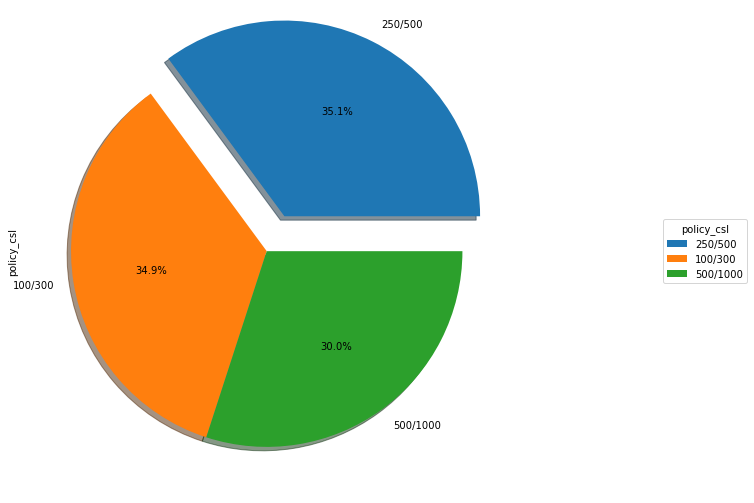




policy_deductable


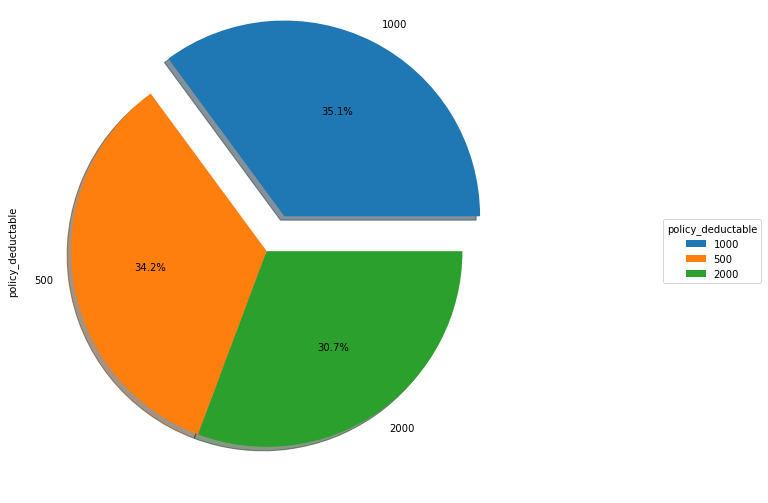




umbrella_limit


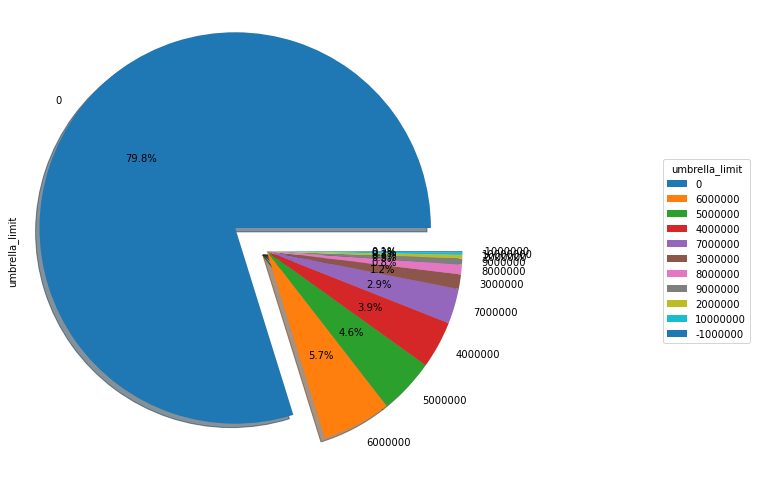




insured_sex


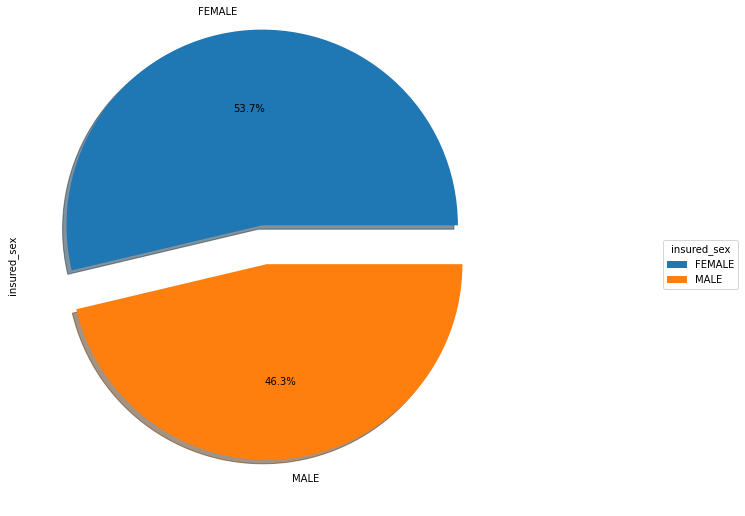




insured_education_level


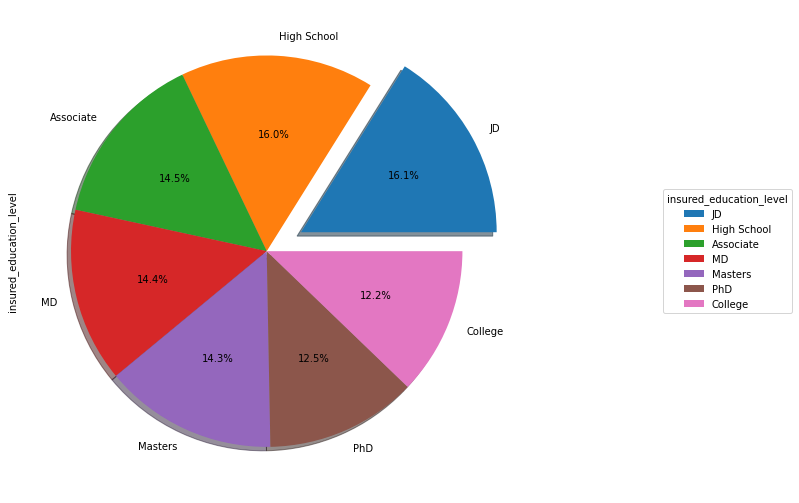




insured_relationship


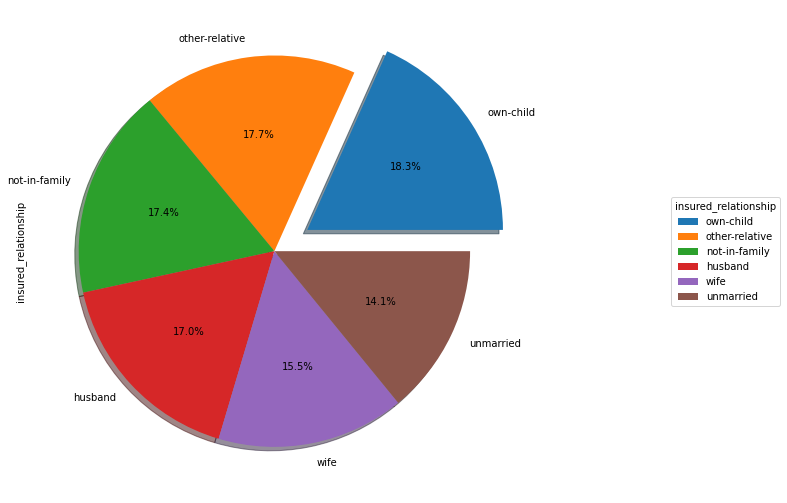




incident_type


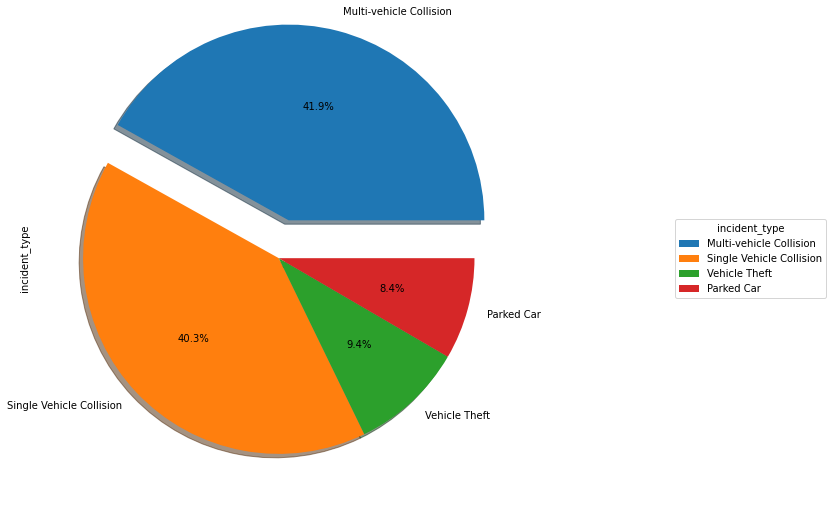




collision_type


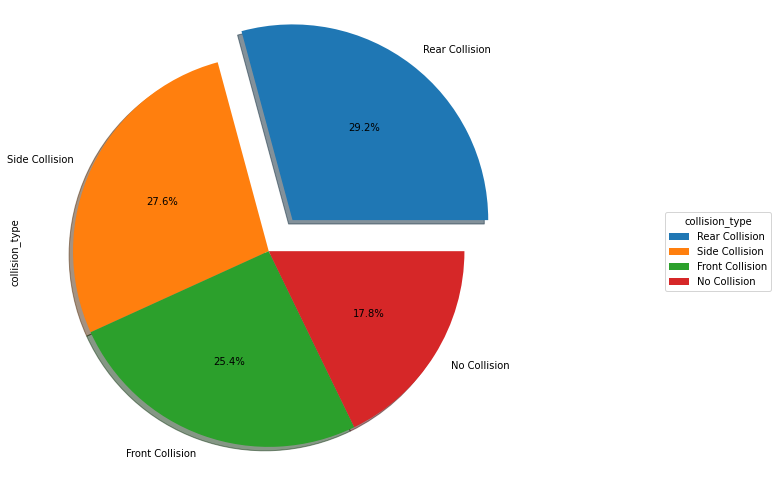




incident_severity


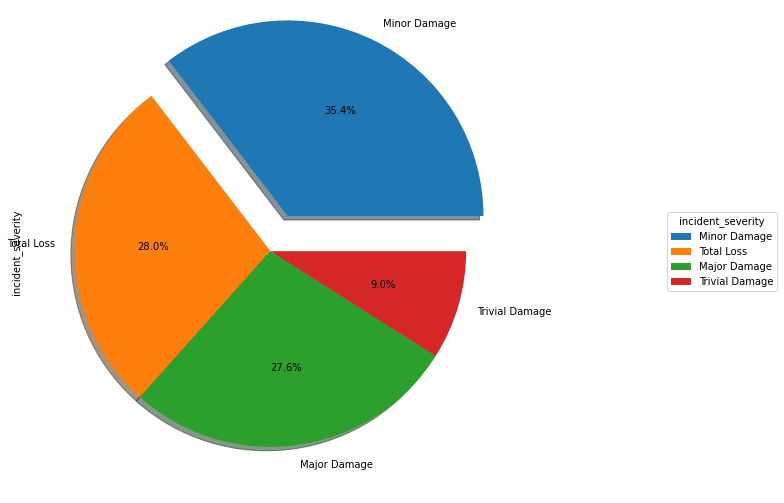




authorities_contacted


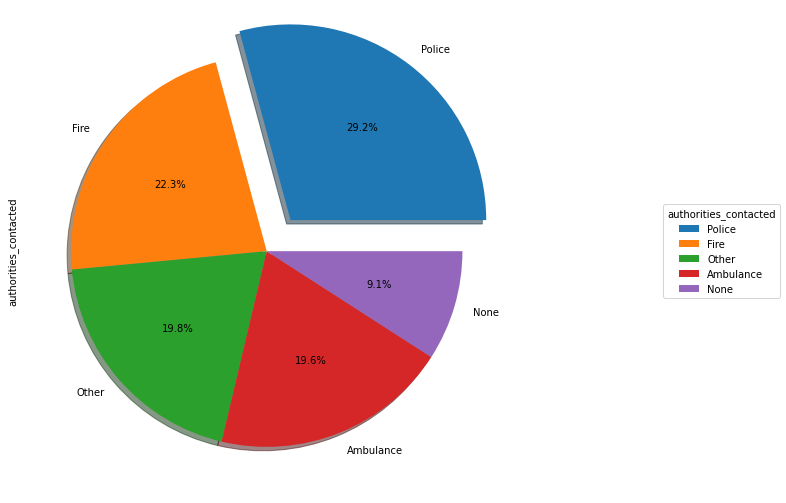




incident_state


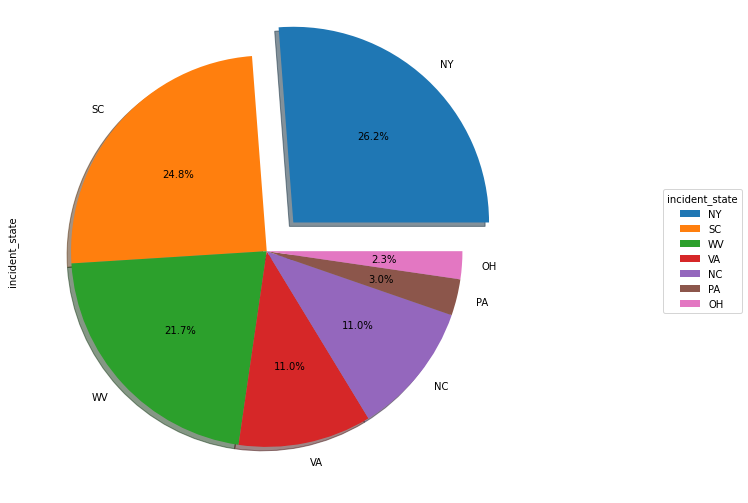




incident_city


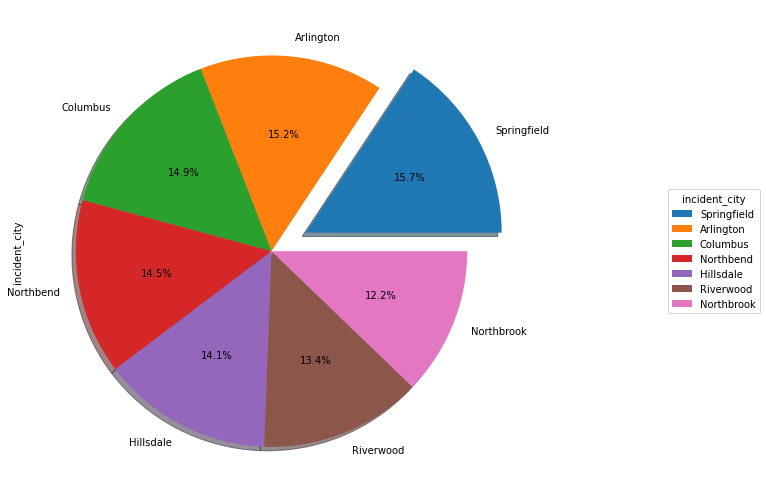




incident_hour_of_the_day


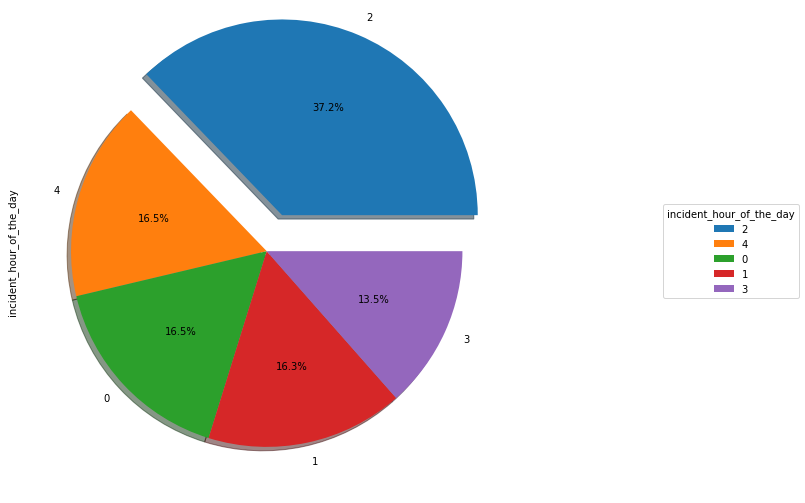




number_of_vehicles_involved


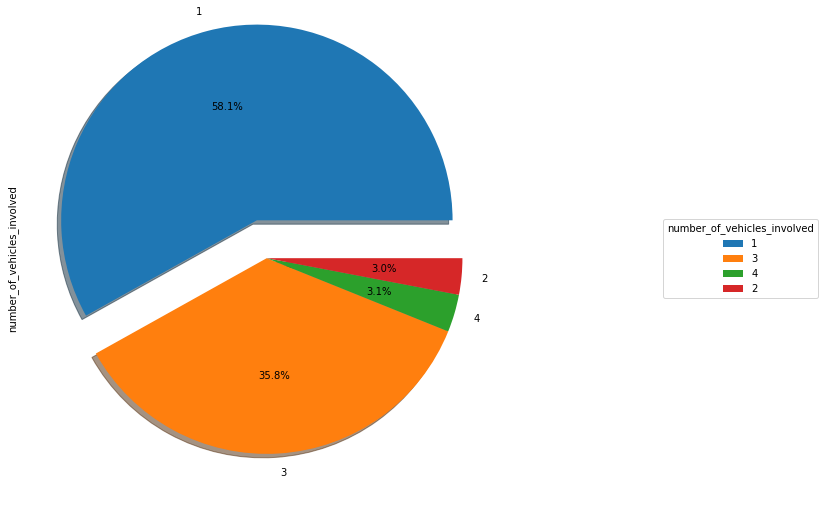




property_damage


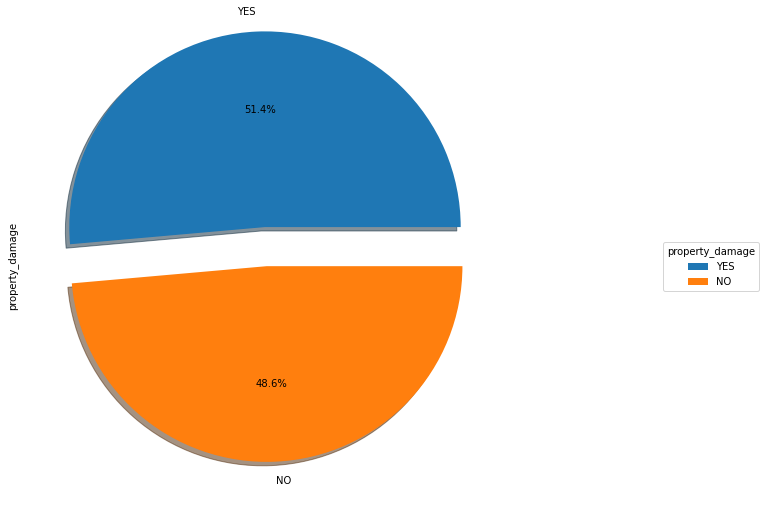




bodily_injuries


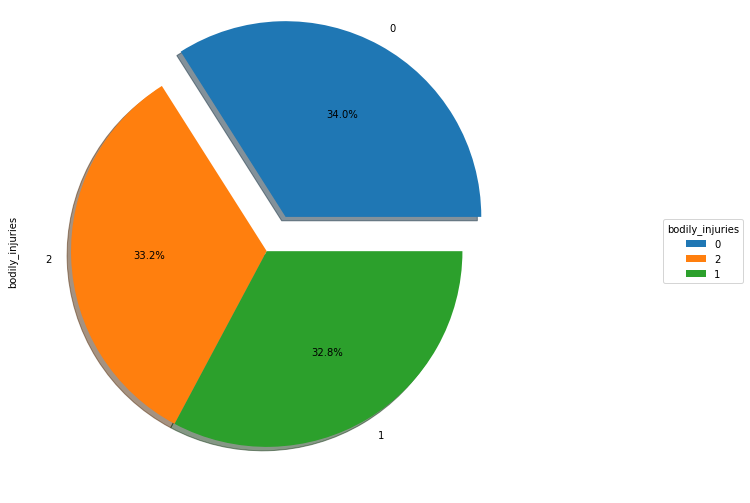




witnesses


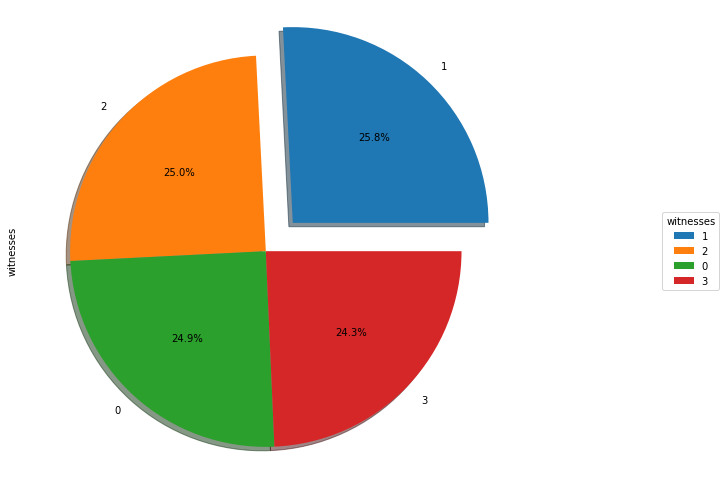




police_report_available


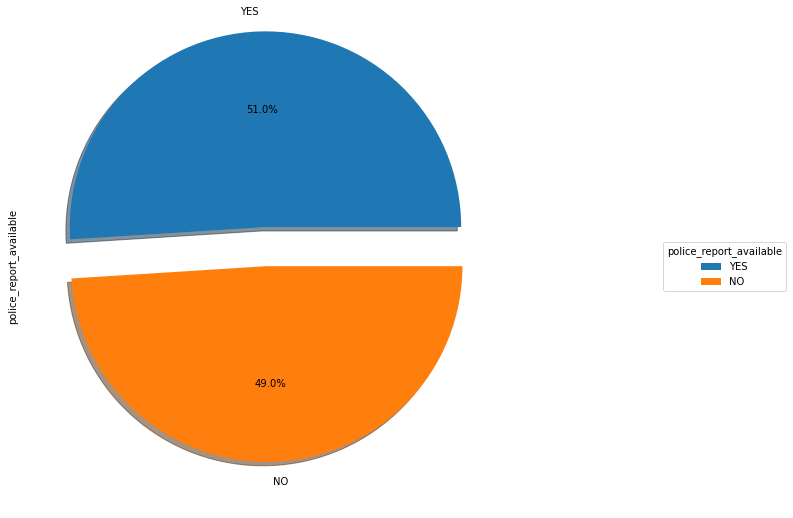




injury_claim


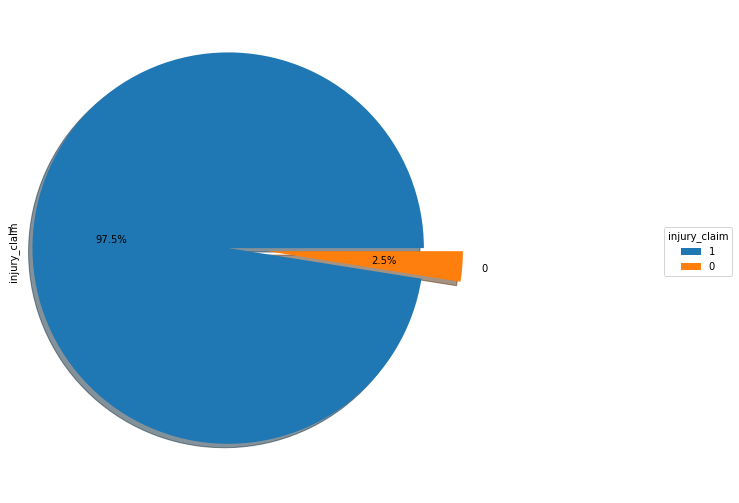




property_claim


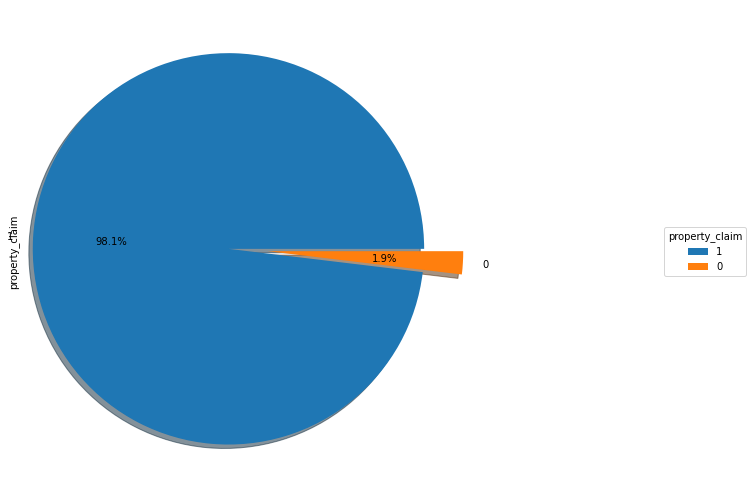




vehicle_claim


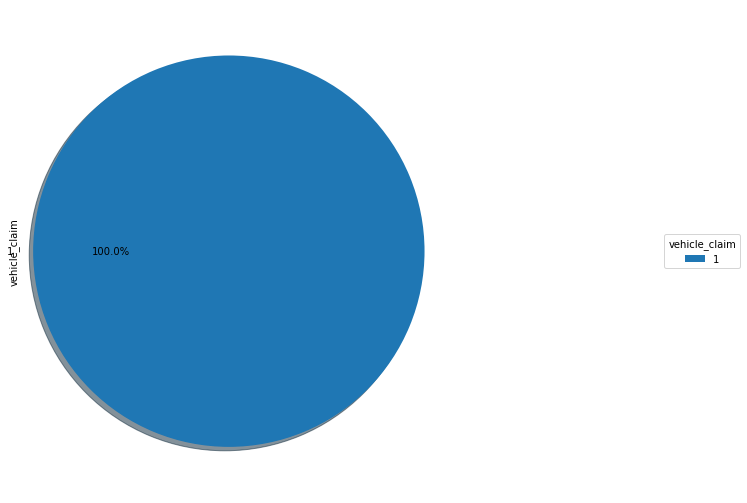




fraud_reported


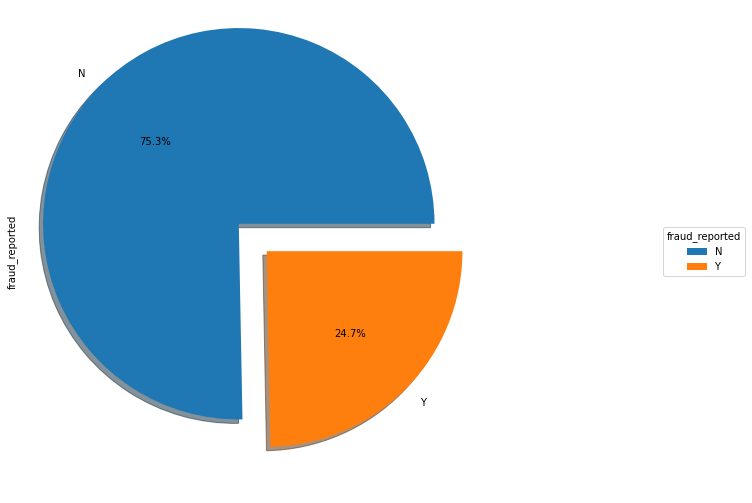




policy_month


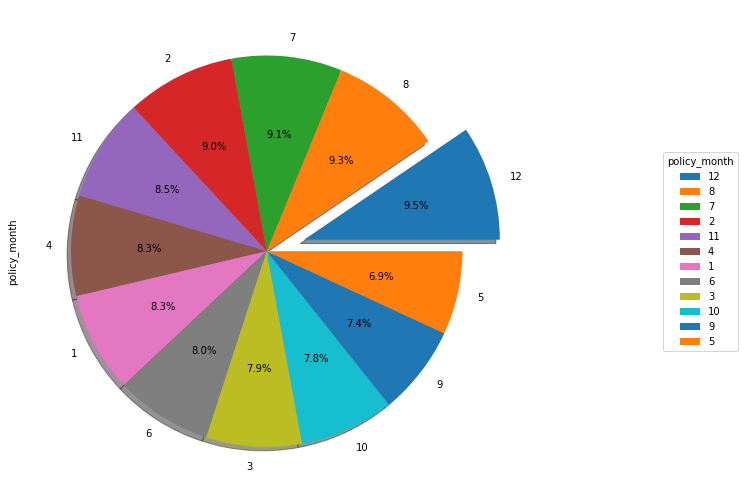




incident_day


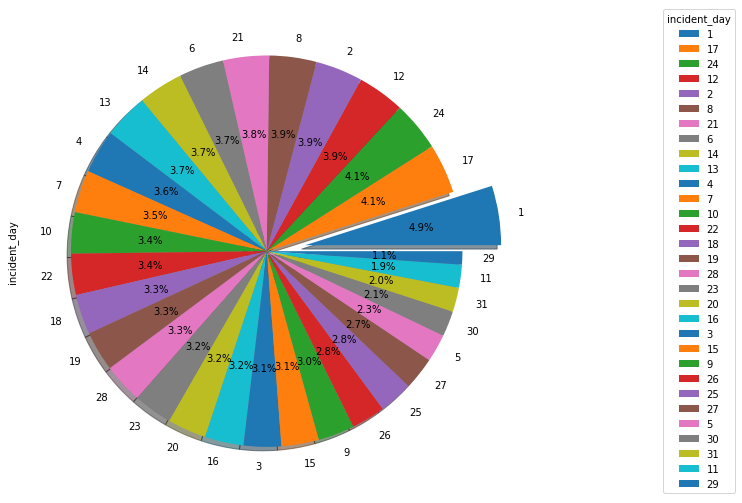




incident_month


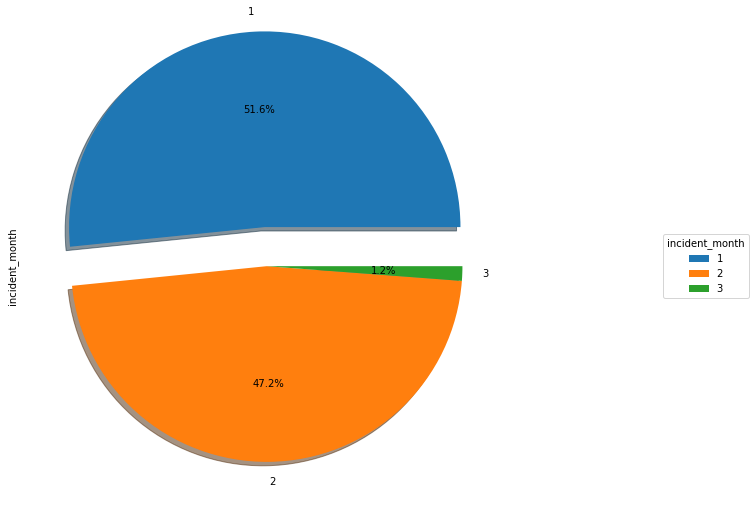

In [47]:
# pie plot for each and every column
for i in visual_set:
    l=i
    print('\033[1m'+l+'\033[1m')
    y=visual_set[i].value_counts()
    exp=[0.2]
    j=int(visual_set[i].nunique())
    k=1
    while k < j:
        exp.append(0)
        k+=1
    z=y.plot.pie(figsize=(9,9),explode=exp, autopct='%2.1f%%', shadow=True)
    z.legend(title =i,loc ="center left",bbox_to_anchor =(1.3, 0, 0.5, 1))
    plt.show()
    print('\n\n')

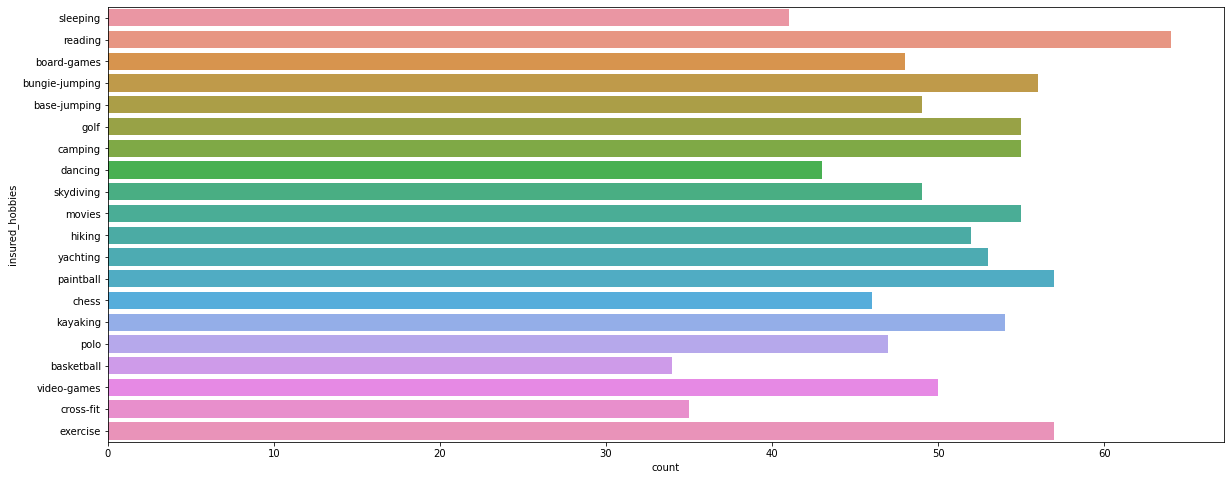

In [48]:
plt.figure(figsize = (20,8))
ax=sns.countplot(y='insured_hobbies',data=trial_set)
plt.show()

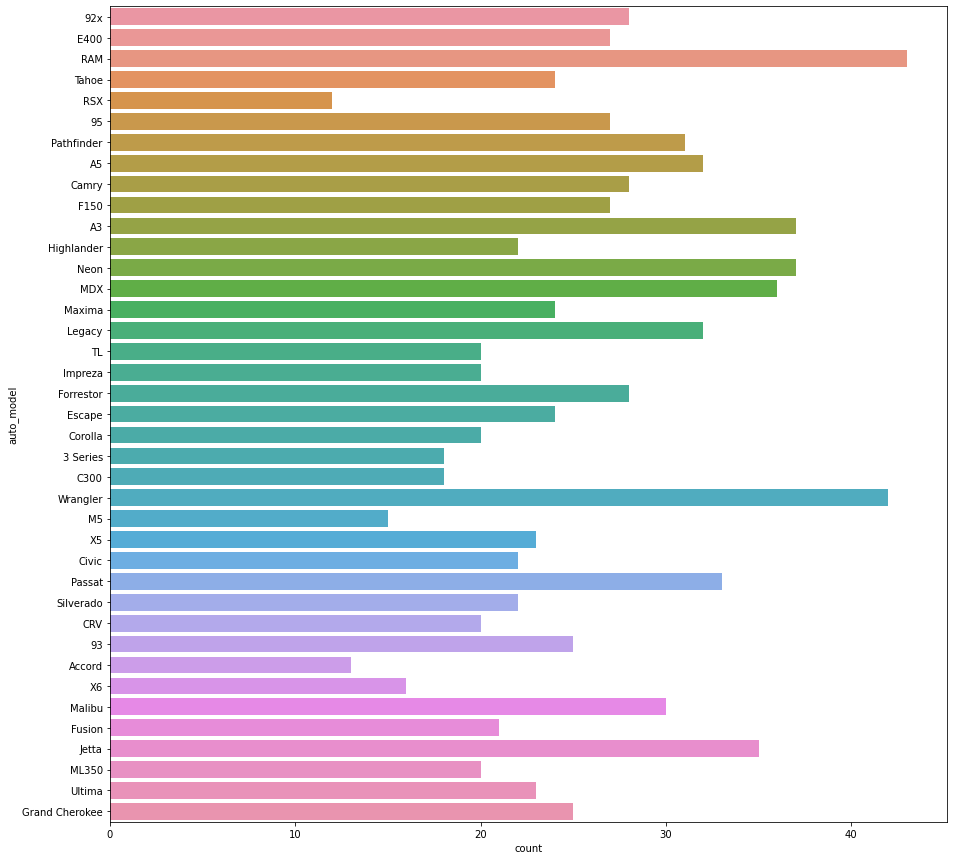

In [49]:
plt.figure(figsize = (15,15))
ax=sns.countplot(y='auto_model',data=trial_set)
plt.show()

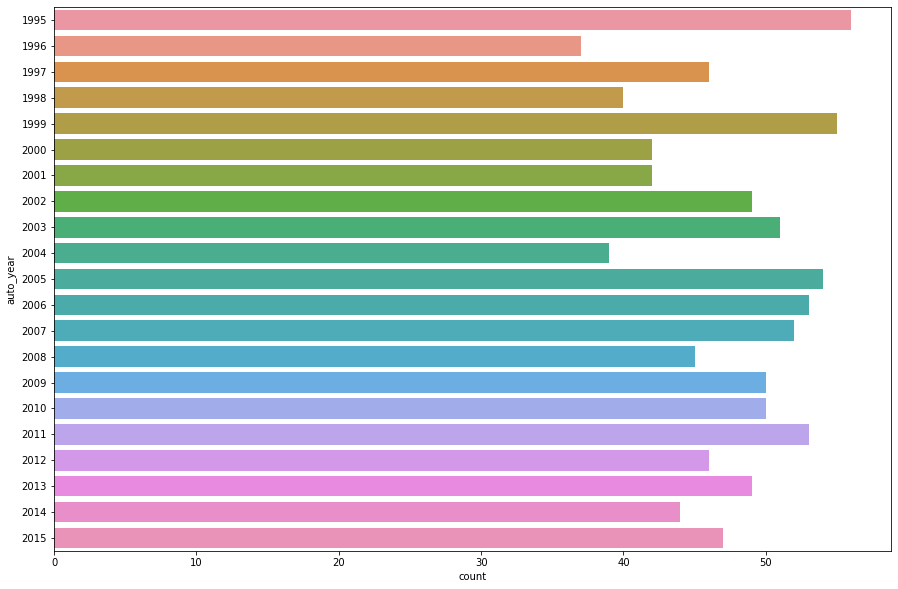

In [50]:
plt.figure(figsize = (15,10))
ax=sns.countplot(y='auto_year',data=trial_set)
plt.show()

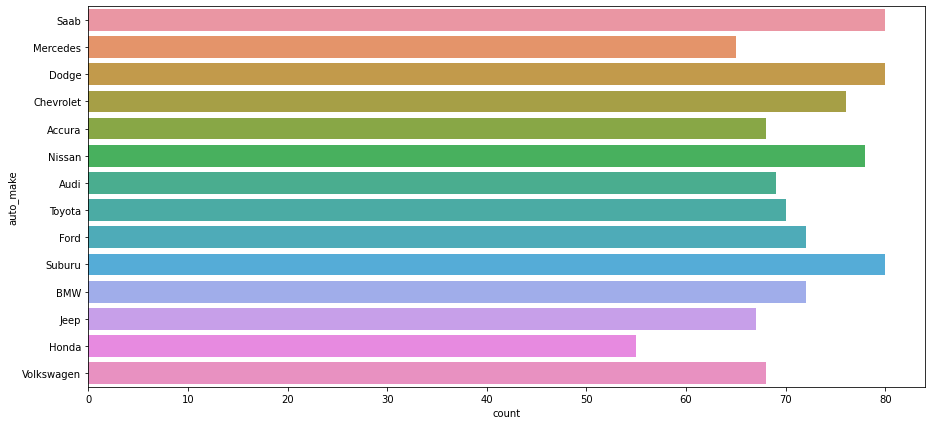

In [51]:
plt.figure(figsize = (15,7))
ax=sns.countplot(y='auto_make',data=trial_set)
plt.show()

Uni-variate Analysis:
1. There are more Bachelors involved.
2. policy state csl and deductable are balanced
3. most customer have zero umberalla limit
4. insured education and relationship is also balanced
5. multi-vehicle and single vehicle collision are most dominant in the dataset when it comes to incident type
6. Rear collision is slightly more than side and front collision
7. minor damage is more in number in incident severity
8. most customers contacted police when the incident occured
9. NY is the state has most incident occuring
10. incident of city is balanced between all 7 city
11. most incidents occurred at mid day
12. most incidents involved only one vehicle
13. body injuries is ranged between 0~2 and balanced
14. witnesses are ranged between 0~3 and balanced
15. almost all the clients have claimed for all the 3 types of claims
16. Fraud reported is imbalanced therefore the dataset is imbalanced
17. policy month is balanced
18. policy date is balanced
19. there are only 3 incident month i.e. jan, feb, and march and march has very minimum incidents
20. most insure are interest in reading and mentioned it as there hobbies 
21. there are variety of car model though wrangler is the most used model of all the car model amongst the clients
22. year-1995 has most automobiles purachase
23. Saab, Dodge, Suburu have equal and highest count amongst all the automakers

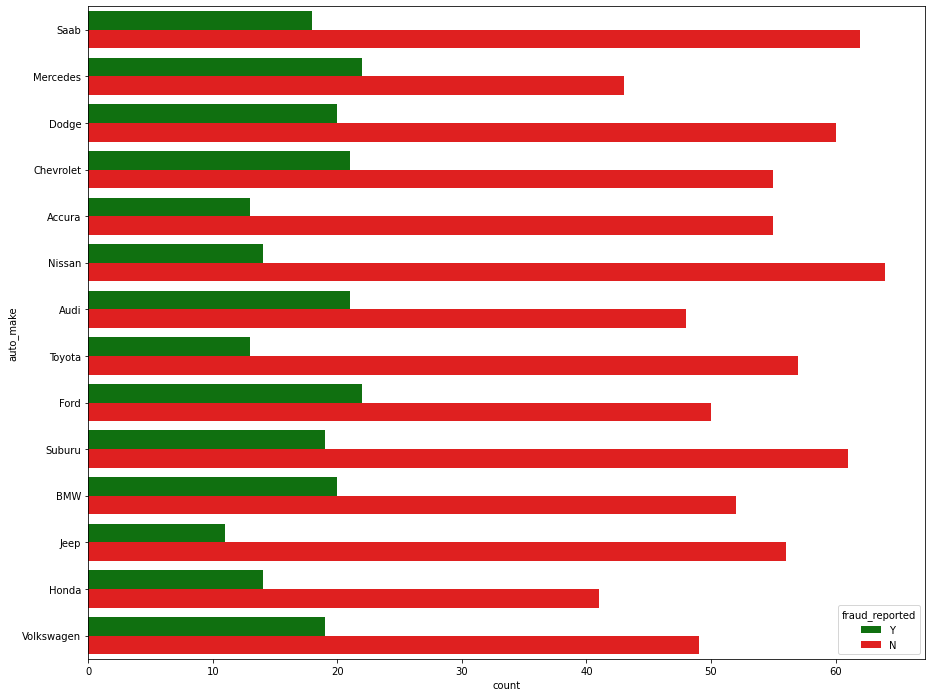

In [52]:
plt.figure(figsize = (15,12))
ax=sns.countplot(y='auto_make',hue='fraud_reported',data=trial_set,palette=['green','red'])
plt.show()

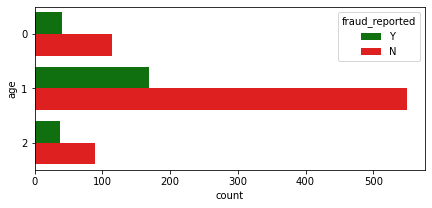

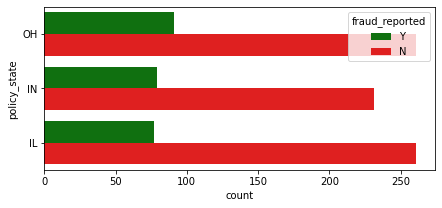

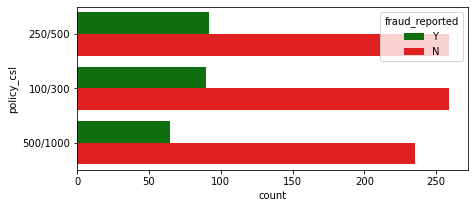

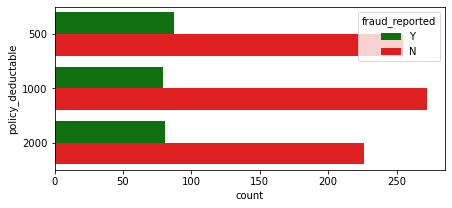

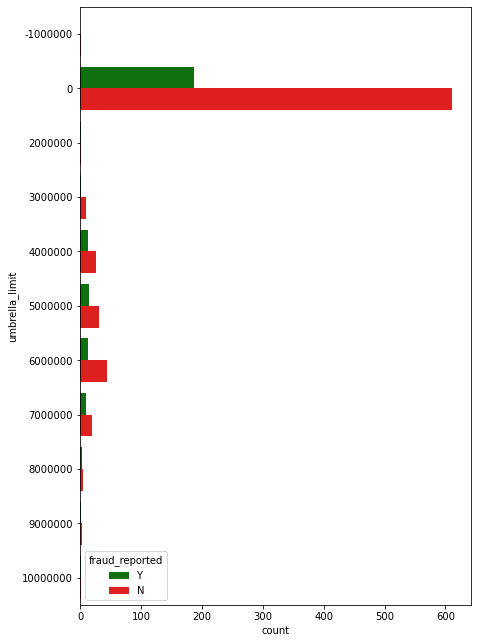

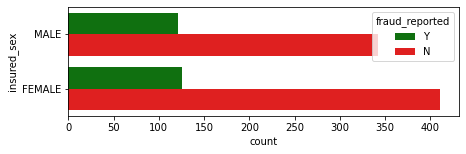

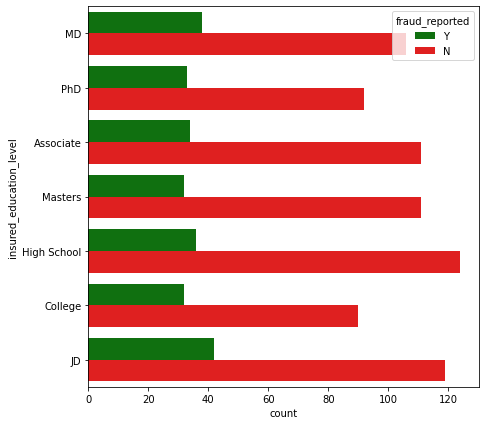

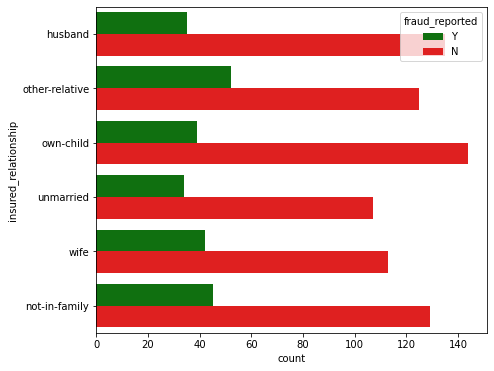

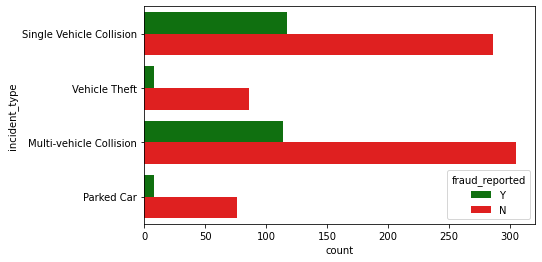

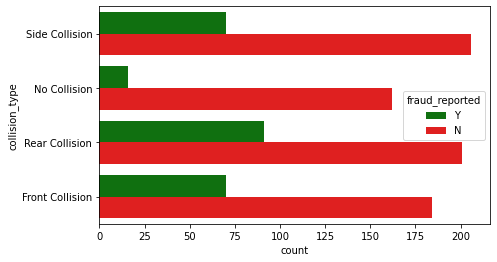

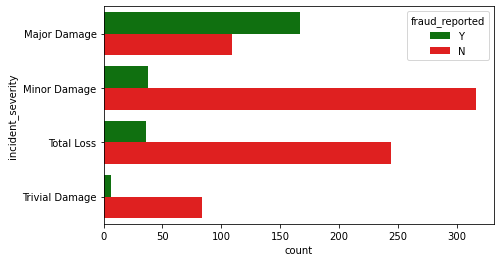

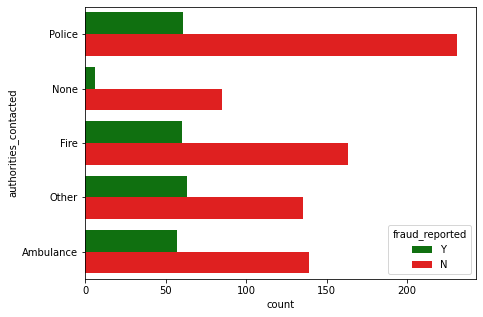

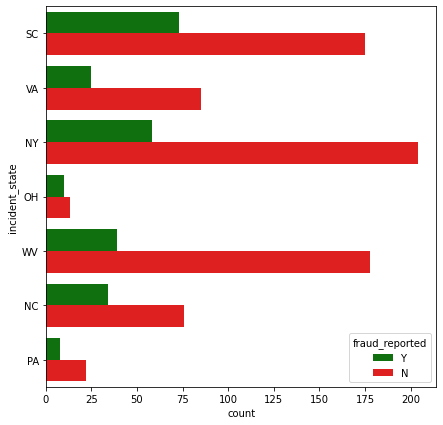

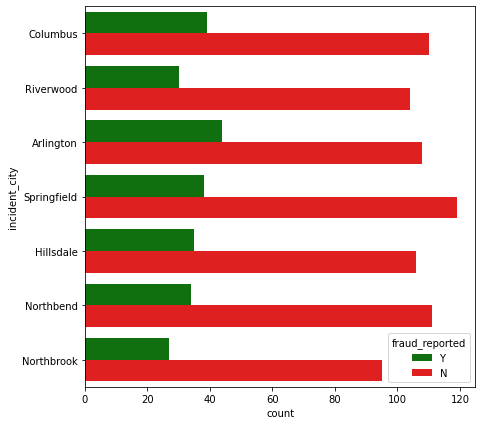

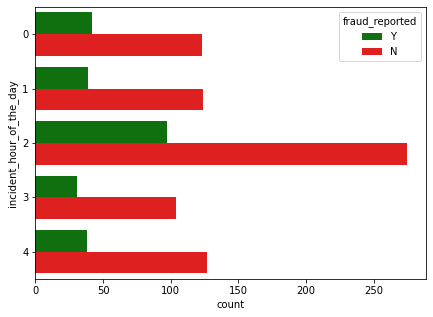

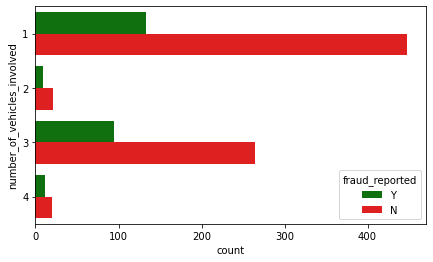

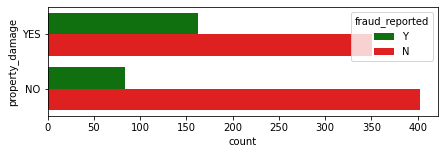

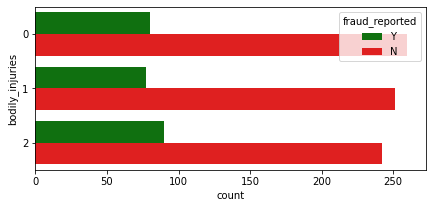

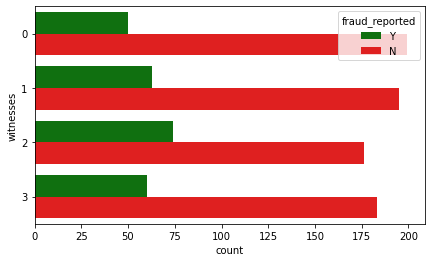

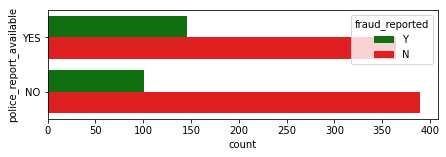

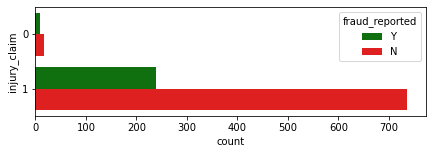

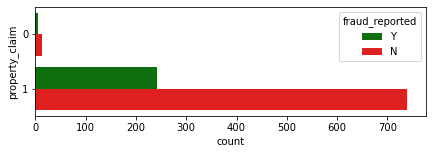

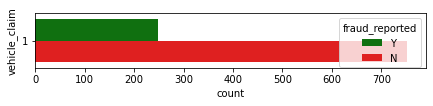

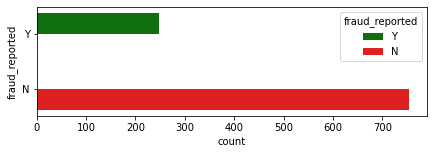

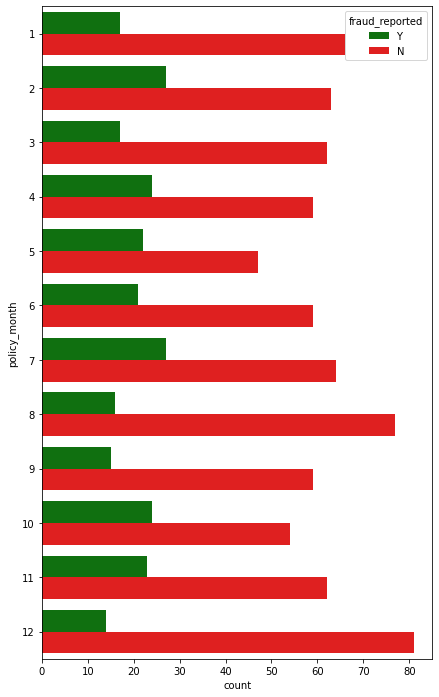

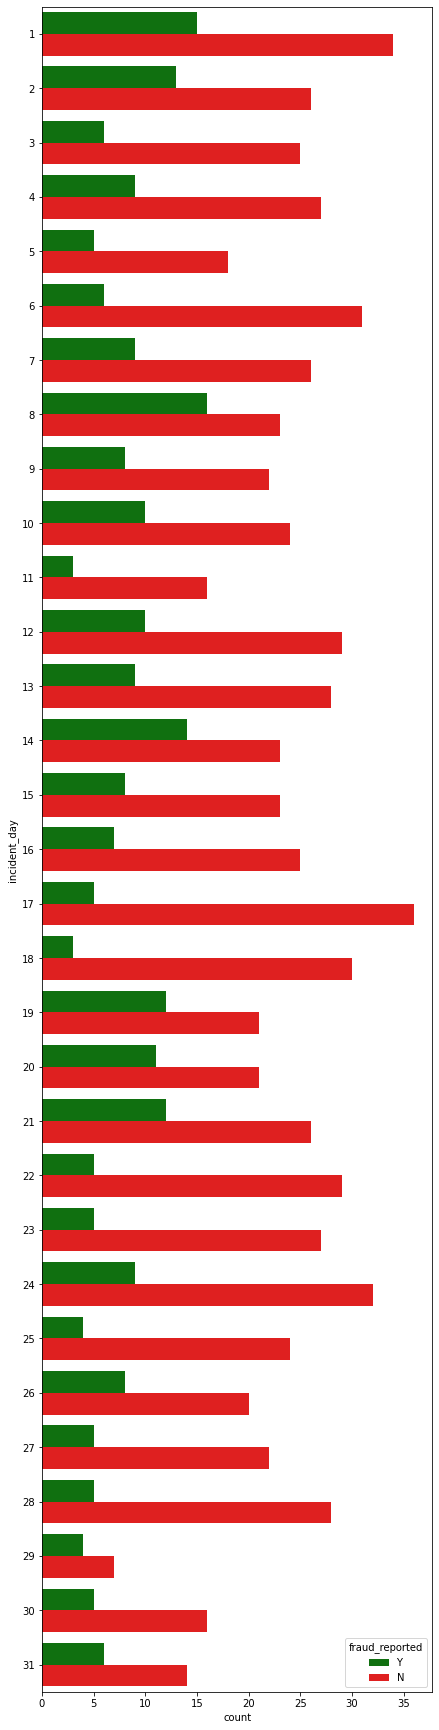

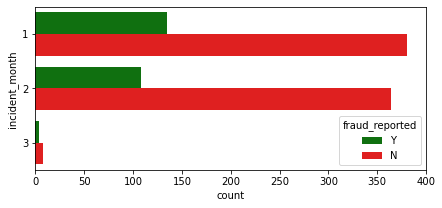

In [53]:
for i in visual_set:
    x=visual_set[i].nunique()
    plt.figure(figsize = (7,x))
    ax=sns.countplot(y=i,hue='fraud_reported',data=visual_set,palette=['green','red'])
    plt.show()

Bi-variate Analysis:
1. client with zero umberalla limit have most frauds
2. JD and MD educated are mostly involved in frauds
3. client who are claiming for single and multi collision are partially fraud
4. major damage are mostly fraud cases
5. incident occurring in board day light have most fraud

In [54]:
# converting ordinal data into numerical data 
le=LabelEncoder()
for i in new_set:
    if new_set[i].dtype=='object':
        new_set[i]=le.fit_transform(new_set[i])

In [55]:
new_set.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [56]:
new_set.shape

(1000, 39)

months_as_customer


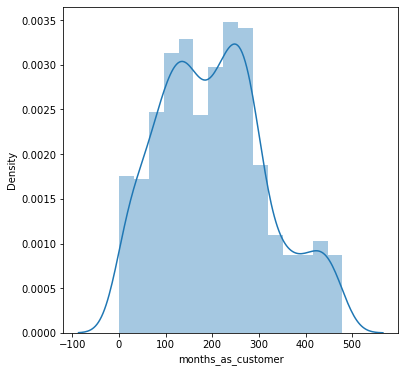

age


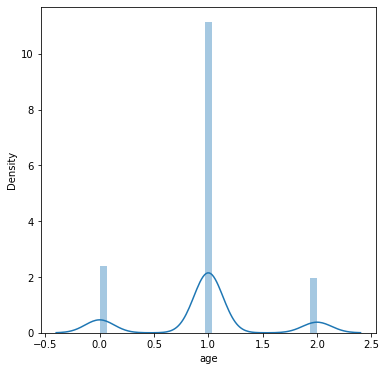

policy_state


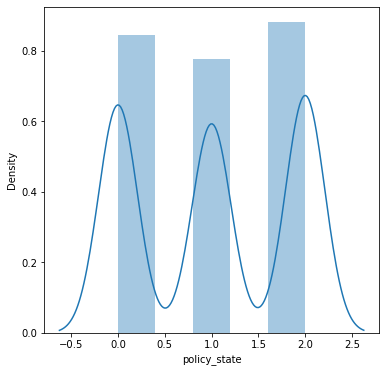

policy_csl


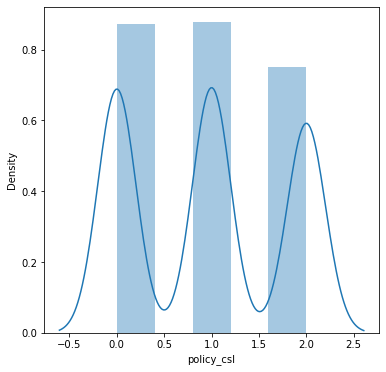

policy_deductable


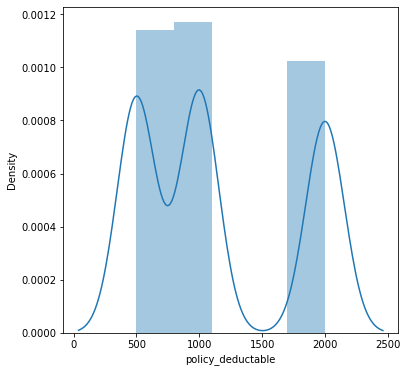

policy_annual_premium


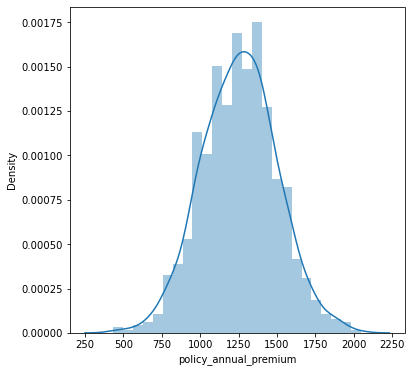

umbrella_limit


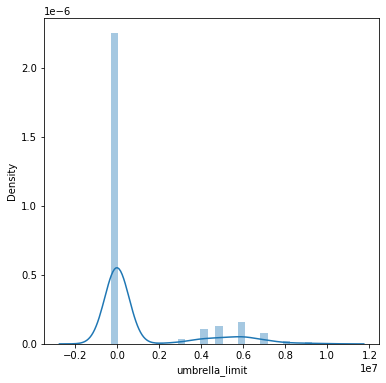

insured_sex


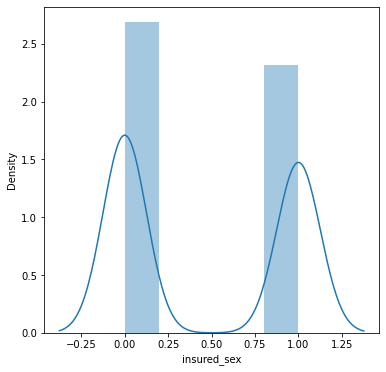

insured_education_level


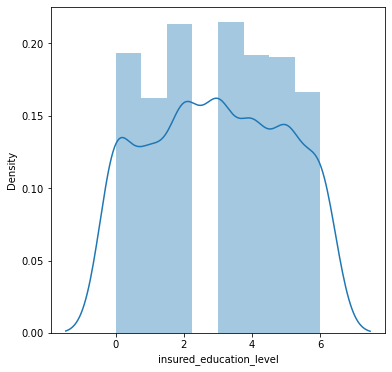

insured_occupation


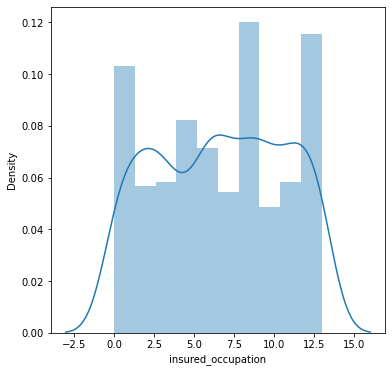

insured_hobbies


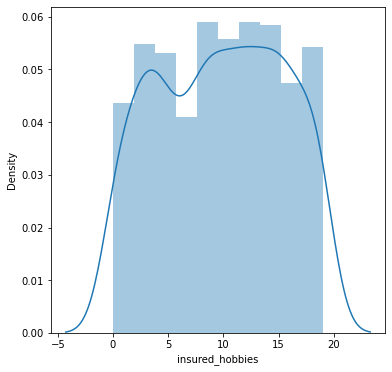

insured_relationship


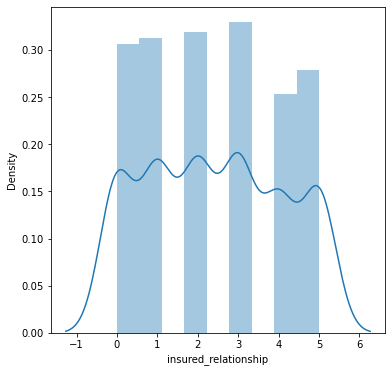

capital-gains


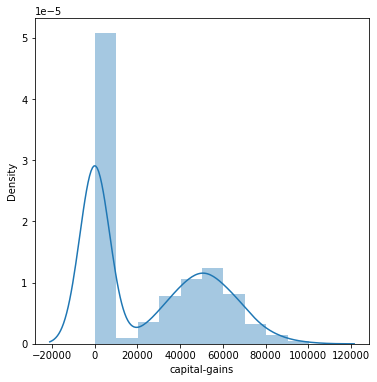

capital-loss


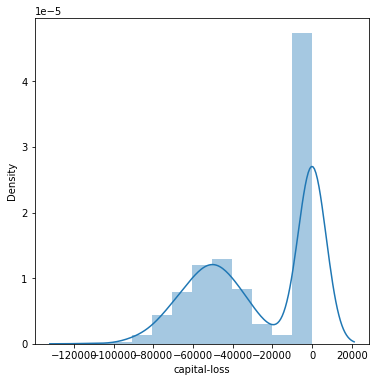

incident_type


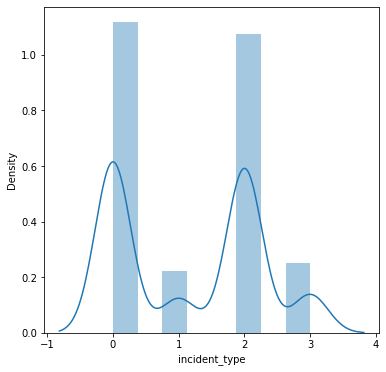

collision_type


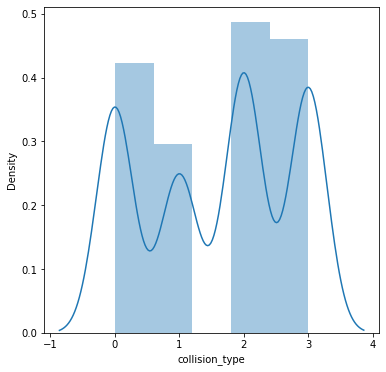

incident_severity


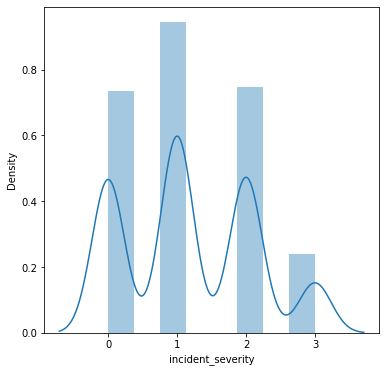

authorities_contacted


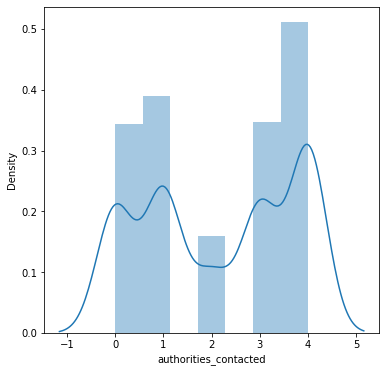

incident_state


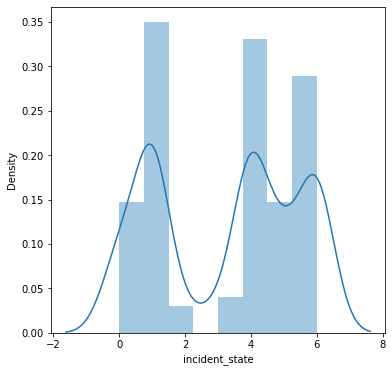

incident_city


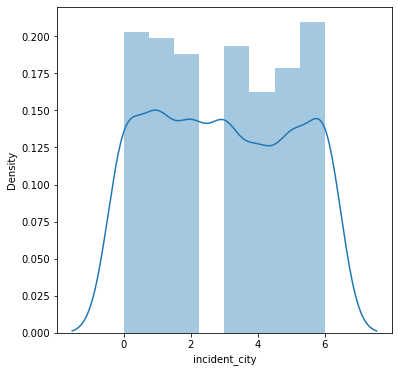

incident_hour_of_the_day


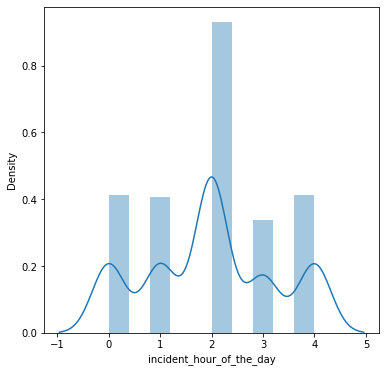

number_of_vehicles_involved


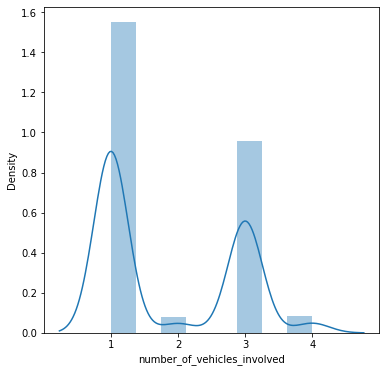

property_damage


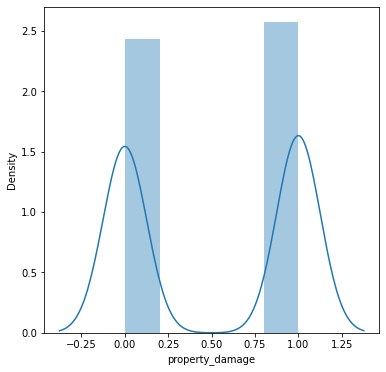

bodily_injuries


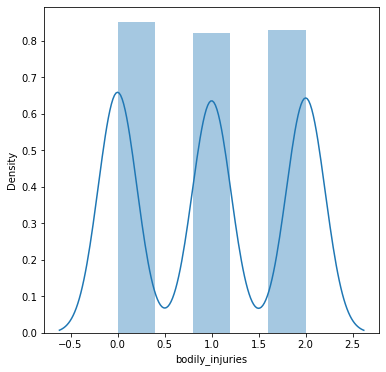

witnesses


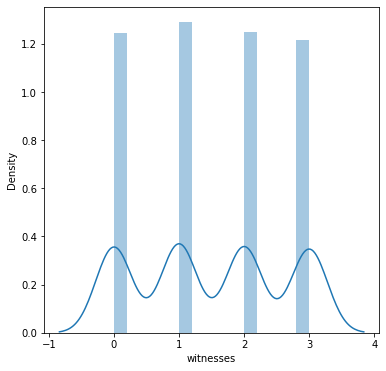

police_report_available


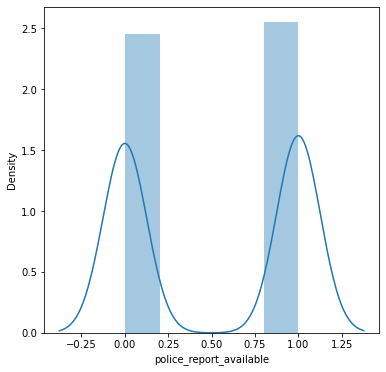

total_claim_amount


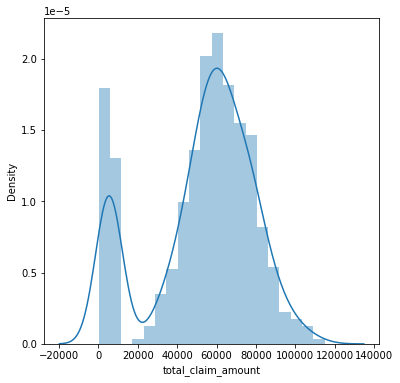

injury_claim


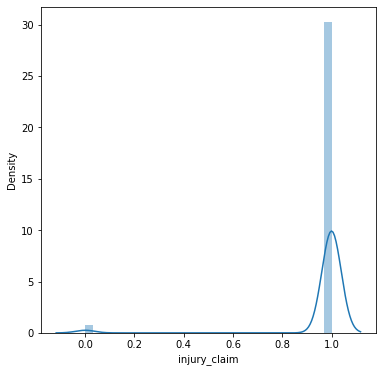

property_claim


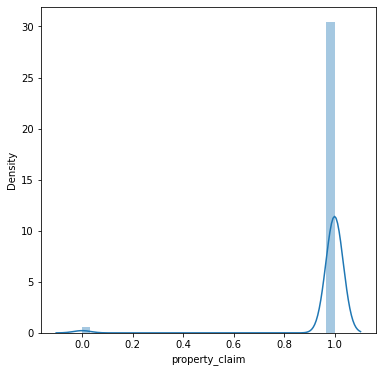

vehicle_claim


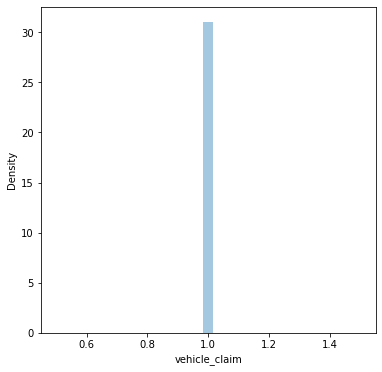

auto_make


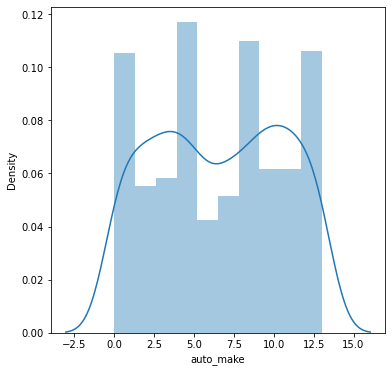

auto_model


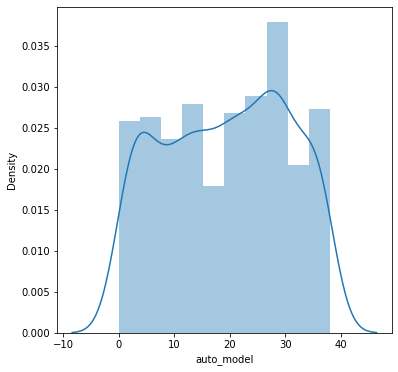

auto_year


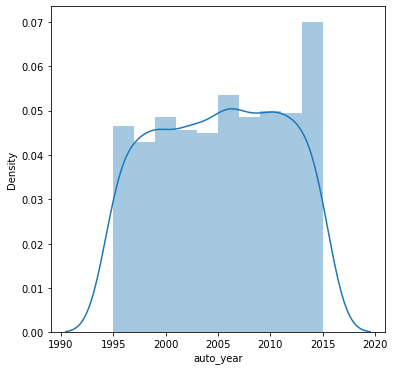

fraud_reported


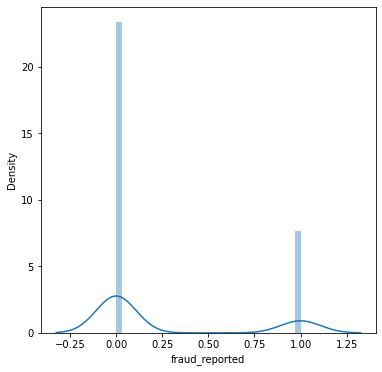

policy_day


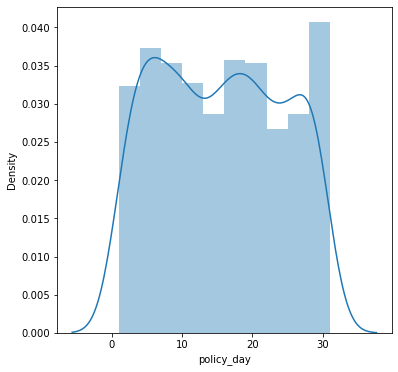

policy_month


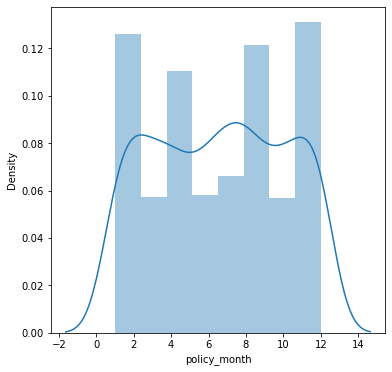

policy_year


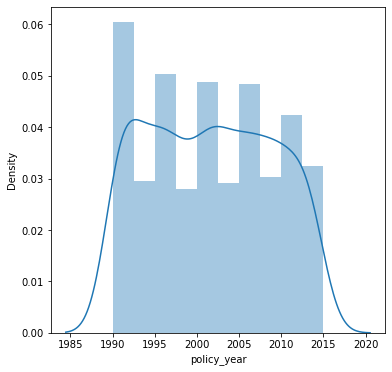

incident_day


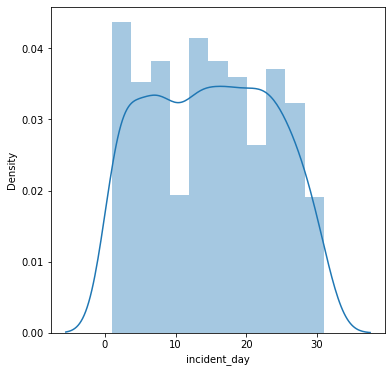

incident_month


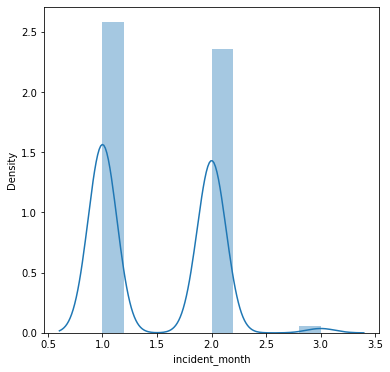

In [57]:
# normal distribution chart of each column
for i in new_set:
    print(i)
    plt.figure(figsize=(6,6))
    sns.distplot(new_set[i])
    plt.show()

months_as_customer


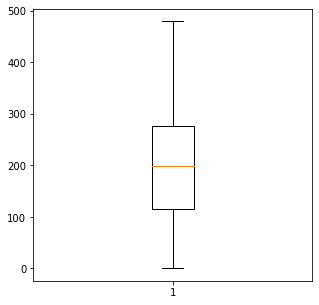

age


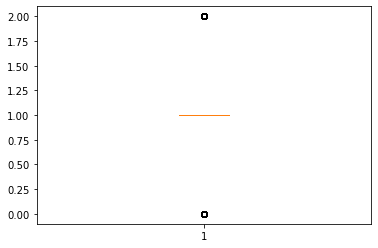

policy_state


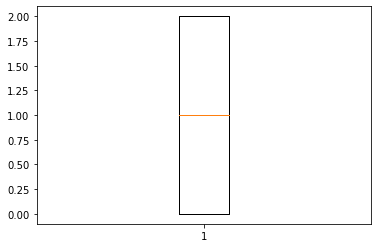

policy_csl


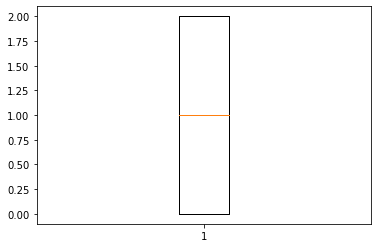

policy_deductable


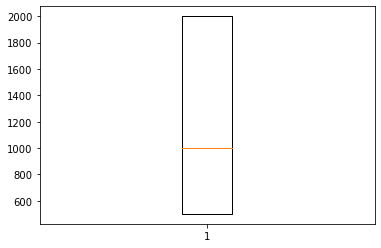

policy_annual_premium


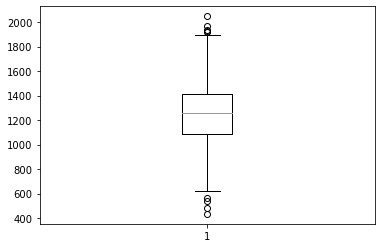

umbrella_limit


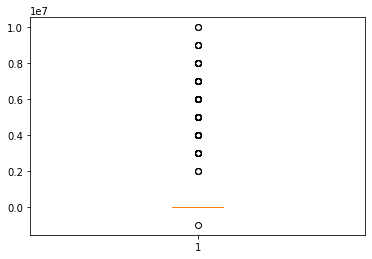

insured_sex


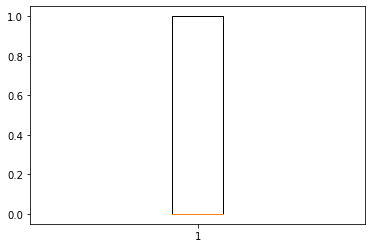

insured_education_level


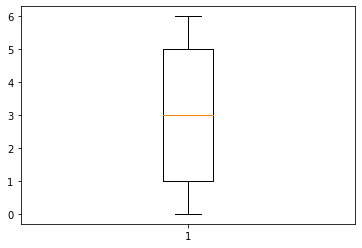

insured_occupation


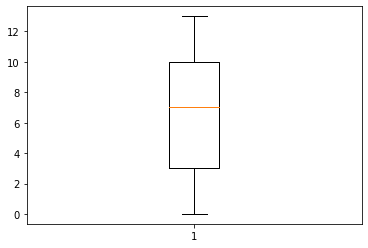

insured_hobbies


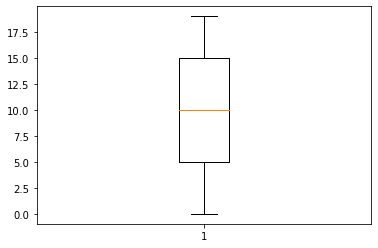

insured_relationship


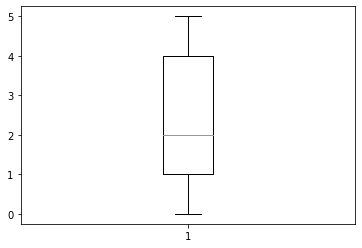

capital-gains


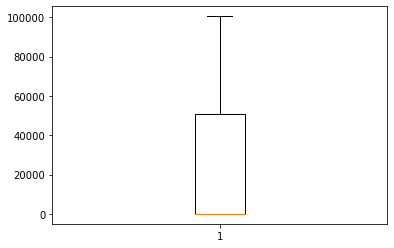

capital-loss


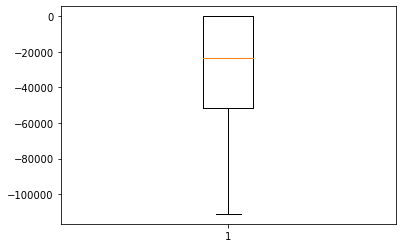

incident_type


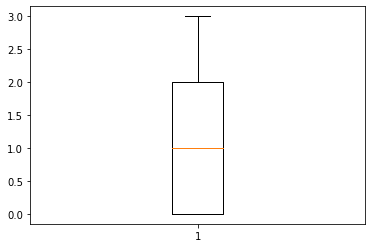

collision_type


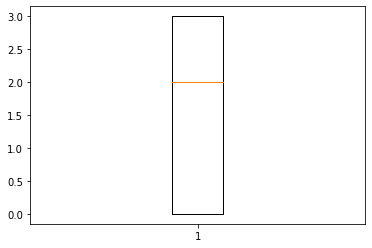

incident_severity


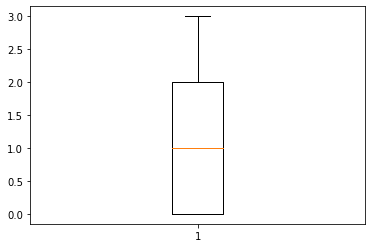

authorities_contacted


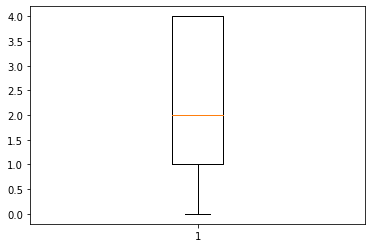

incident_state


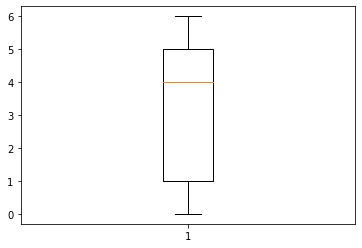

incident_city


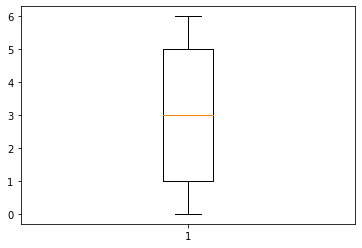

incident_hour_of_the_day


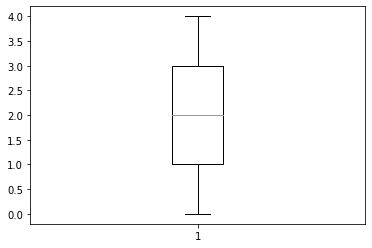

number_of_vehicles_involved


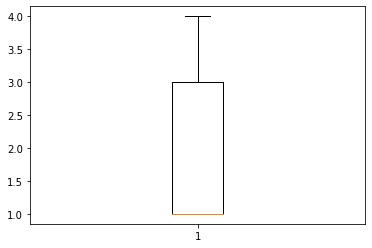

property_damage


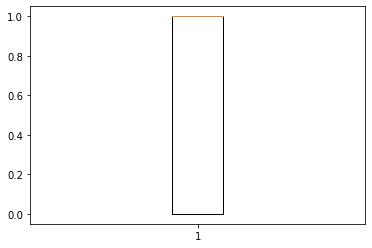

bodily_injuries


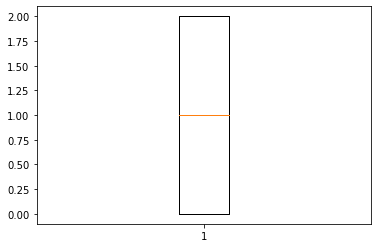

witnesses


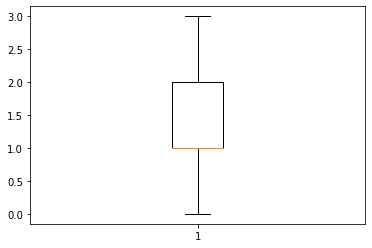

police_report_available


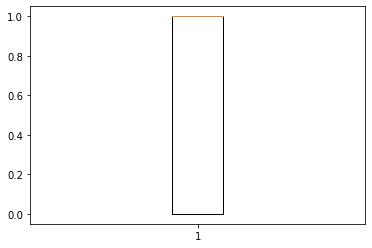

total_claim_amount


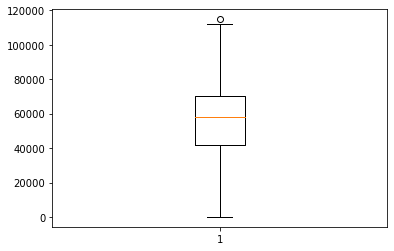

injury_claim


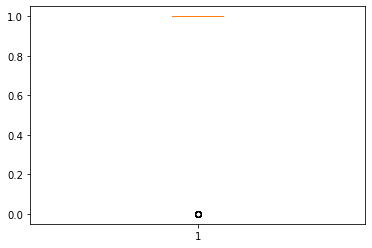

property_claim


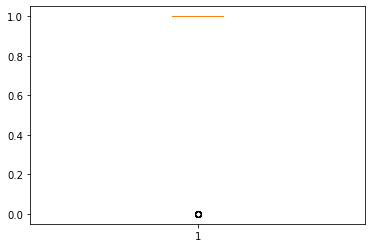

vehicle_claim


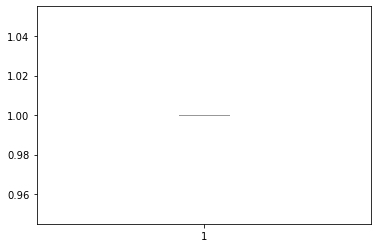

auto_make


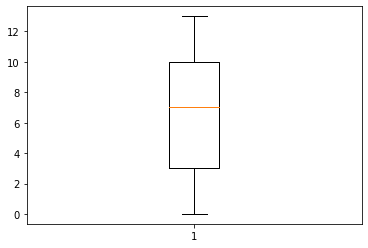

auto_model


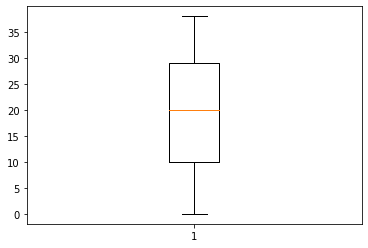

auto_year


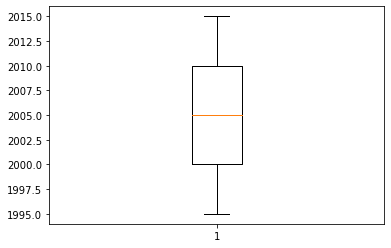

fraud_reported


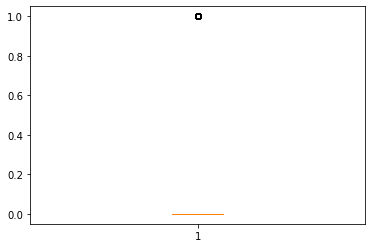

policy_day


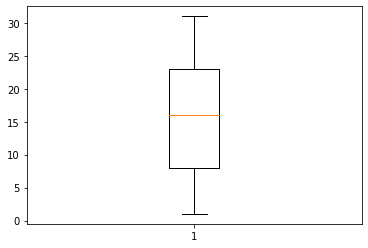

policy_month


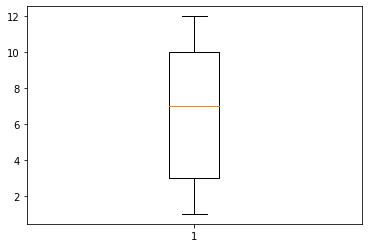

policy_year


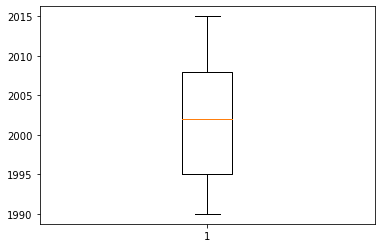

incident_day


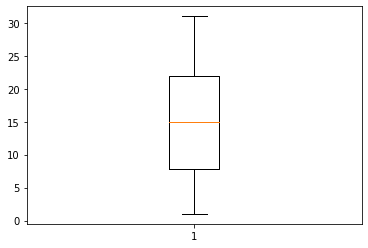

incident_month


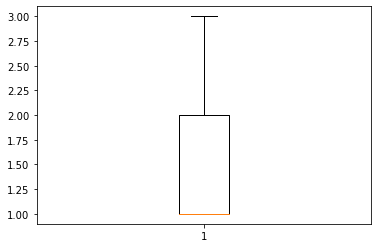

In [58]:
# looking for outliers in the dataset
fig = plt.figure(figsize =(5, 5))
for i in new_set: 
    # Creating plot
    print(i)
    plt.boxplot(new_set[i])
    # show plot
    plt.show()

In [59]:
#arresting the outliers using IQR method
def arr_out(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    whisker_width = 1.5
    news_outliers = df[(df[column] < Q1 - whisker_width*IQR) | (df[column] > Q3 + df*IQR)]
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[column]=np.where(df[column]>upper_whisker,upper_whisker,np.where(df[column]<lower_whisker,lower_whisker,df[column]))

In [60]:
arr_out(new_set,'policy_annual_premium')
arr_out(new_set,'total_claim_amount')

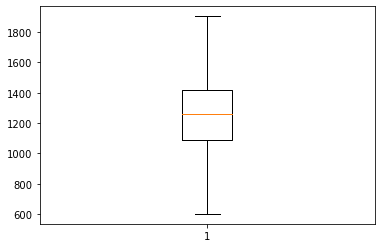

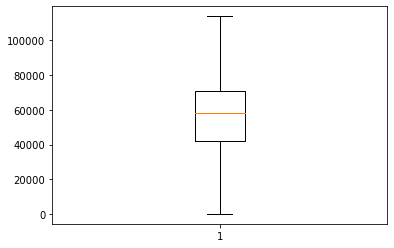

In [61]:
plt.boxplot(new_set['policy_annual_premium'])
plt.show()
plt.boxplot(new_set['total_claim_amount'])
plt.show()

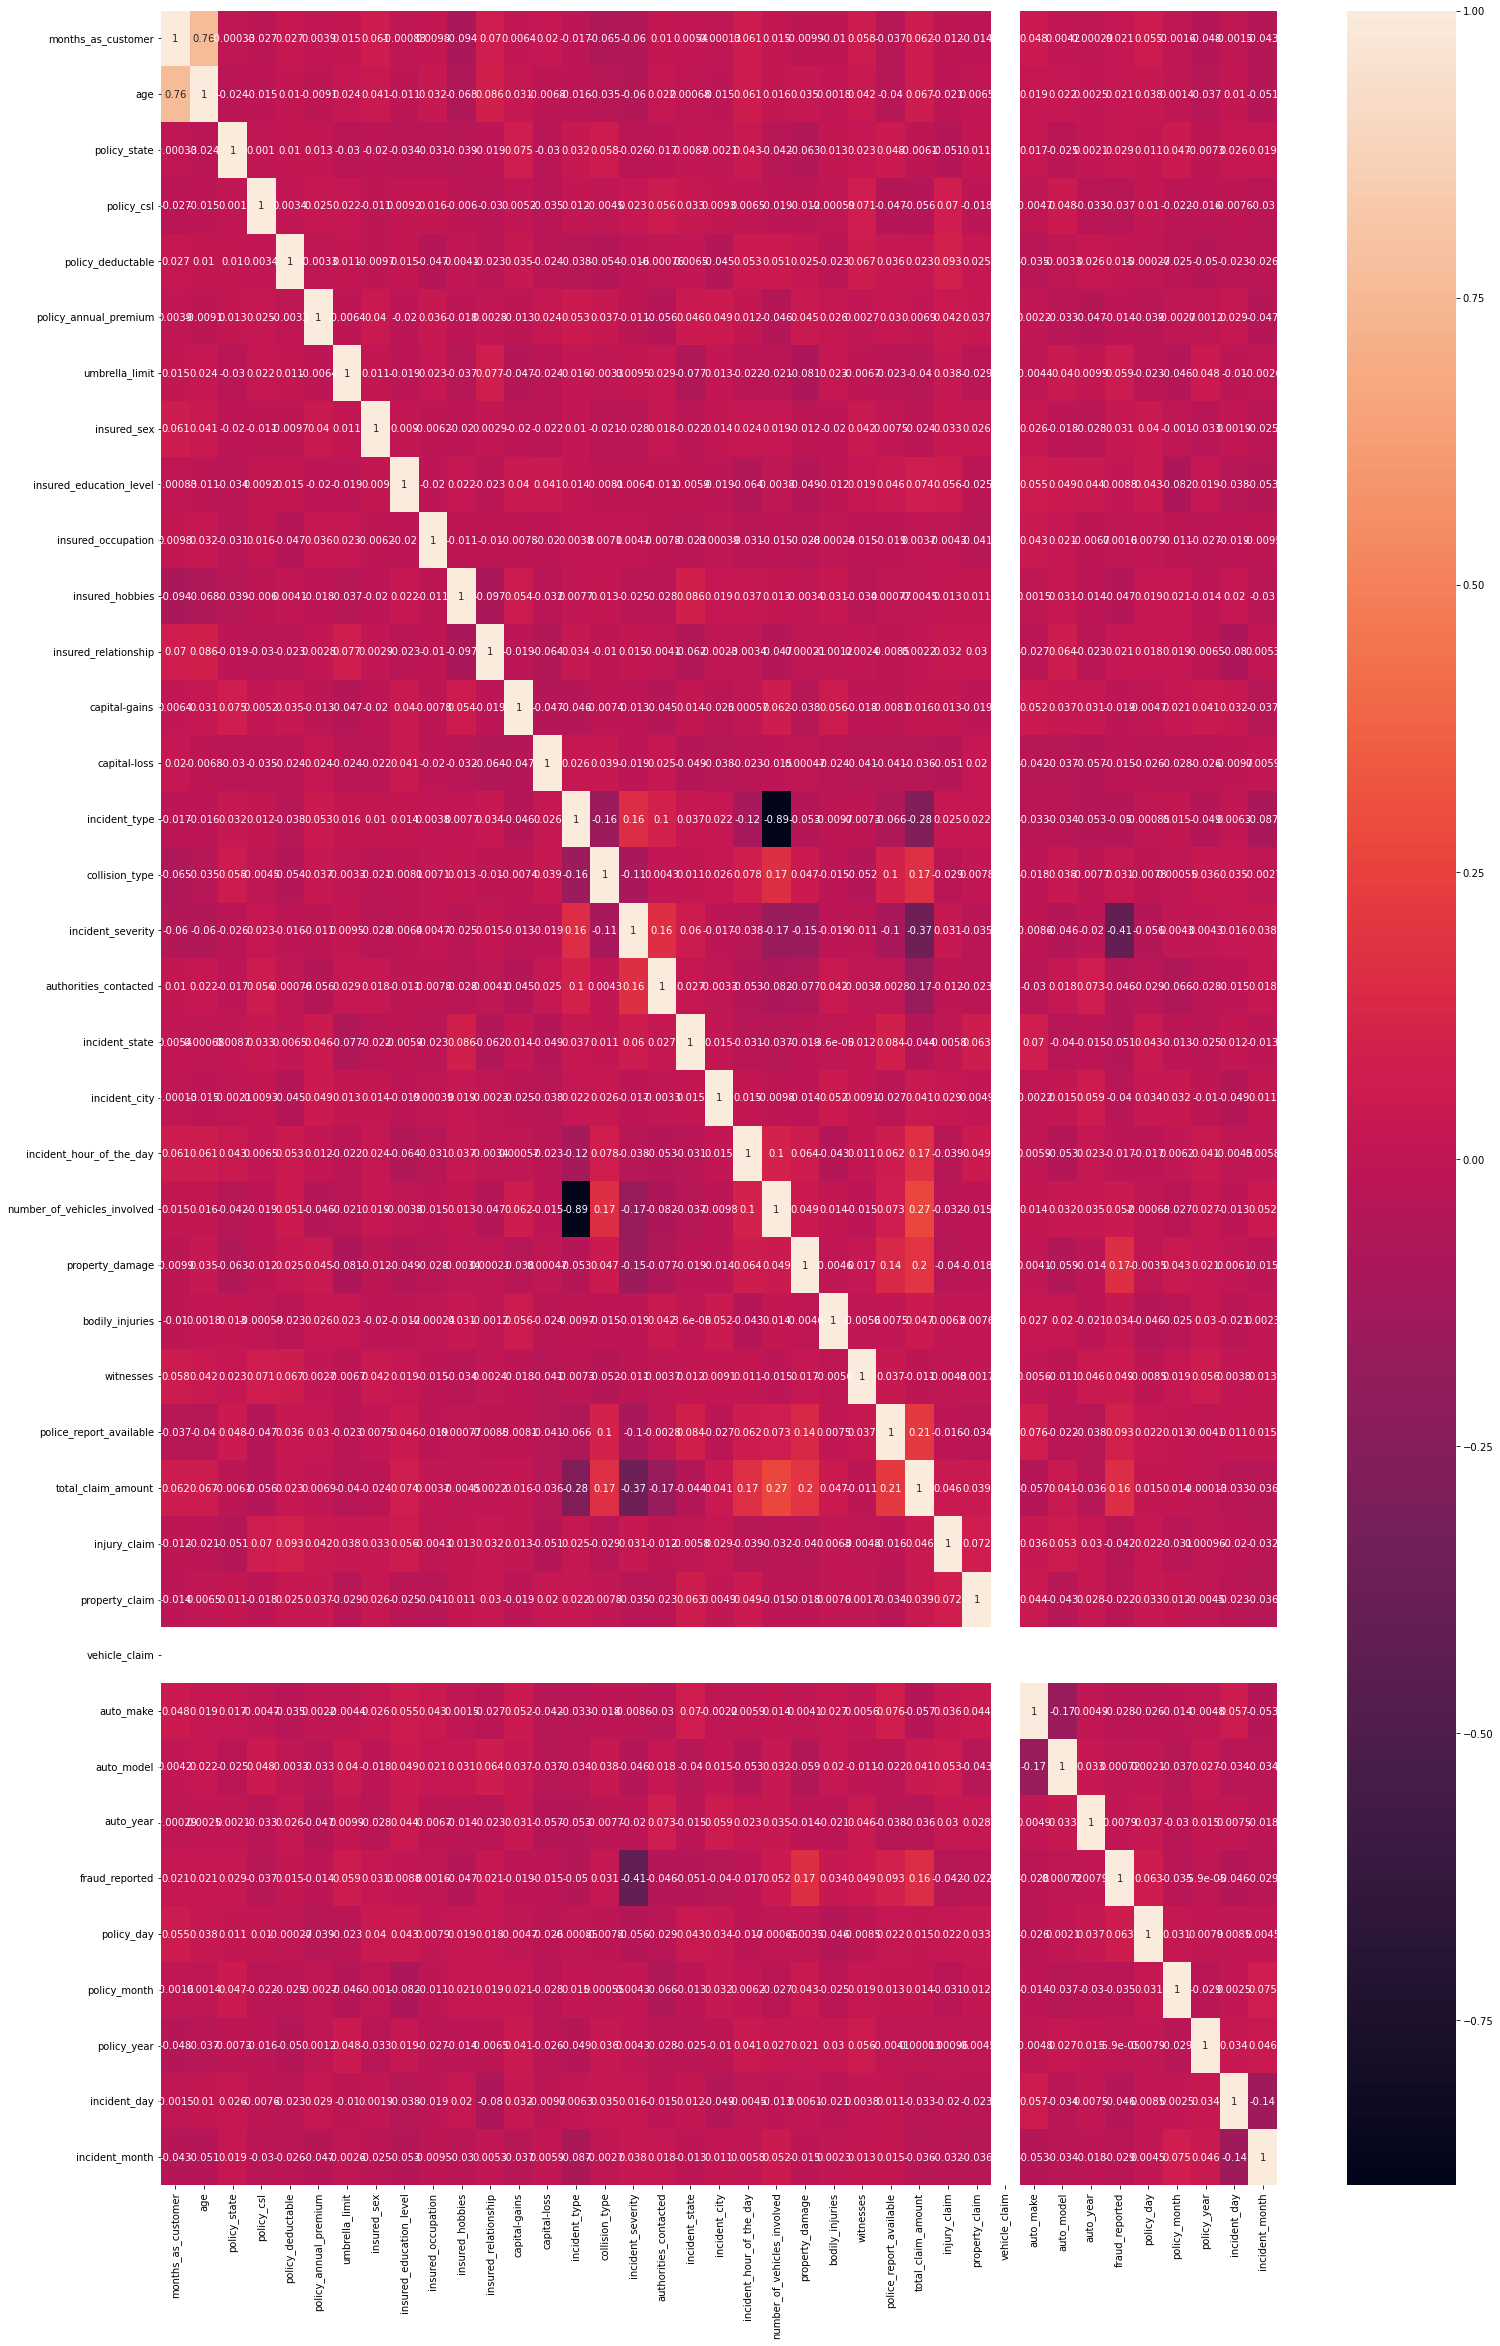

In [62]:
#corelation
plt.figure(figsize=(25,40))
sns.heatmap(new_set.corr(), annot=True)
plt.show()

In [63]:
# dropping these due to high multi-collinearity
new_set.drop(columns=['incident_type','vehicle_claim','age'],inplace=True)

In [64]:
new_set.skew()

months_as_customer             0.362177
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.016003
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
collision_type                -0.177814
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day       0.052528
number_of_vehicles_involved    0.502664
property_damage               -0.056106
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available       -0.040068
total_claim_amount            -0.595351


In [65]:
#separating feature columns and target column
X=new_set.drop(columns=['fraud_reported'])
Y=new_set['fraud_reported']

In [66]:
#Normalized the data
scalar= StandardScaler()
X_scaled= scalar.fit_transform(X)

In [67]:
#checking VIF value of the feature variables
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
  
vif_data

,feature,VIF
0,months_as_customer,1.054523
1,policy_state,1.038372
2,policy_csl,1.032477
3,policy_deductable,1.041521
4,policy_annual_premium,1.031743
5,umbrella_limit,1.034872
6,insured_sex,1.022829
7,insured_education_level,1.053597
8,insured_occupation,1.016504
9,insured_hobbies,1.043976


Class=1, n=247 (24.700%)
Class=0, n=753 (75.300%)


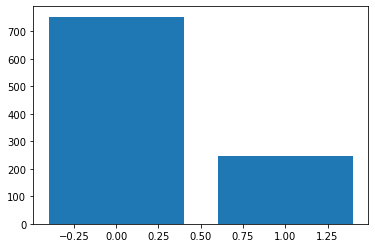

In [68]:
counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=1, n=753 (50.000%)
Class=0, n=753 (50.000%)


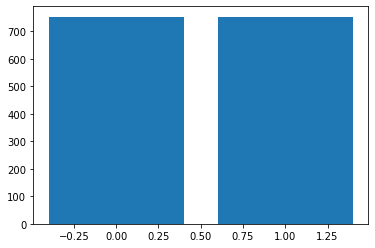

In [69]:
#balancing the dataset
oversample = SMOTE()
X_over, Y_over = oversample.fit_resample(X_scaled, Y)

counter = Counter(Y_over)
for k,v in counter.items():
    per = v / len(Y_over) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [70]:
#splitting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_over, Y_over, train_size=0.8)

In [71]:
Counter(Y_train)

Counter({1: 605, 0: 599})

In [72]:
Counter(Y_test)

Counter({1: 148, 0: 154})

MODEL TRAINING

In [73]:
logr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = gs(estimator=logr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [74]:
grid_search.best_score_

0.7619077134986227

In [75]:
grid_search.best_estimator_

LogisticRegression(C=0.01, solver='newton-cg')

In [76]:
model1=LogisticRegression(C=0.01, solver='newton-cg')
model1.fit(X_train,Y_train)
p1=model1.predict(X_test)
print(classification_report(p1, Y_test))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       165
           1       0.73      0.79      0.76       137

    accuracy                           0.77       302
   macro avg       0.77      0.77      0.77       302
weighted avg       0.77      0.77      0.77       302



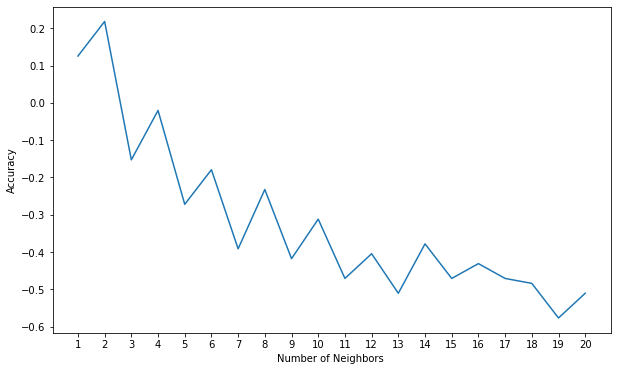

In [77]:
knc = KNeighborsClassifier()
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knc = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat2= knc.predict(X_test)
    mean_acc[i-1] = metrics.r2_score(Y_test, yhat2)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [78]:
knn=KNeighborsClassifier()
para={
        'n_neighbors':[1,2,3],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50,60],
        'p':[2,3],
        'metric':['minkowski']
    
}
knn_gs= gs(estimator =knn, param_grid=para,cv=10, n_jobs=5)
knn_gs.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50, 60], 'metric': ['minkowski'],
                         'n_neighbors': [1, 2, 3], 'p': [2, 3],
                         'weights': ['uniform', 'distance']})

In [79]:
knn_gs.best_score_

0.7666460055096419

In [80]:
knn_gs.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [82]:
model2=KNeighborsClassifier(n_neighbors=2)
model2.fit(X_train,Y_train)
p2=model2.predict(X_test)
print(classification_report(p2, Y_test))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       125
           1       0.90      0.75      0.82       177

    accuracy                           0.80       302
   macro avg       0.81      0.82      0.80       302
weighted avg       0.82      0.80      0.81       302



In [85]:
xgb= XGBClassifier()
param={
    'n_estimators':[200,250,300,350],
    'learning_rate':[0.01,0.1,0.15,0.2],
    'subsample':[0.3,0.4,0.6],
    'max_depth':[3,5,7,9,10],
    'colsample_bytree':[0.1,0.2,0.3,0.4],
    'min_child_weight':[1,2,3,4,5]
}
xgb_C=gs(xgb,param_grid=param,cv=10,refit=True,n_jobs=10)
xgb_C.fit(X_train,Y_train)

[00:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, v

In [86]:
rfc=RandomForestClassifier()
paras={
      'max_depth':[1,2,3,4,5],
    'min_samples_split':[1,2,3,4],
    'max_leaf_nodes':[10,20,30,40,50],
    'min_samples_leaf':[100,200,300,400],
    'n_estimators':[100,200,300,400],
    'max_samples': [0.1,0.2,0.3,0.4],
    'max_features':[15,20,25,30,34]
}
rfc_gs= gs(estimator =rfc, param_grid=paras,cv=10, n_jobs=10)
rfc_gs.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [15, 20, 25, 30, 34],
                         'max_leaf_nodes': [10, 20, 30, 40, 50],
                         'max_samples': [0.1, 0.2, 0.3, 0.4],
                         'min_samples_leaf': [100, 200, 300, 400],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400]})

In [87]:
xgb_C.best_score_

0.895378787878788

In [88]:
xgb_C.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.3, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [89]:
model3=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=9,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=350, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.3, tree_method='exact', validate_parameters=1,
              verbosity=None)
model3.fit(X_train,Y_train)
p3=model3.predict(X_test)
print(classification_report(p3, Y_test))

[07:53:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       166
           1       0.86      0.93      0.89       136

    accuracy                           0.90       302
   macro avg       0.90      0.90      0.90       302
weighted avg       0.90      0.90      0.90       302



In [90]:
rfc_gs.best_score_

0.7998415977961433

In [91]:
rfc_gs.best_estimator_

RandomForestClassifier(max_depth=1, max_features=15, max_leaf_nodes=40,
                       max_samples=0.3, min_samples_leaf=100,
                       min_samples_split=4, n_estimators=200)

In [92]:
model4=RandomForestClassifier(max_depth=1, max_features=15, max_leaf_nodes=40,
                       max_samples=0.3, min_samples_leaf=100,
                       min_samples_split=4, n_estimators=200)
model4.fit(X_train,Y_train)
p4=model4.predict(X_test)
print(classification_report(p4, Y_test))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       173
           1       0.74      0.85      0.79       129

    accuracy                           0.81       302
   macro avg       0.81      0.82      0.81       302
weighted avg       0.82      0.81      0.81       302



In [94]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, p1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, p2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(Y_test, p3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(Y_test, p4)


print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, p1))
print('roc_auc_score for KNeighbors Classifier: ', roc_auc_score(Y_test, p2))
print('roc_auc_score for XGB Classifier: ', roc_auc_score(Y_test, p3))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(Y_test, p4))

roc_auc_score for Logistic Regression:  0.7707090207090208
roc_auc_score for KNeighbors Classifier:  0.8064671814671815
roc_auc_score for XGB Classifier:  0.8998332748332749
roc_auc_score for Random Forest Classifier:  0.8099333099333099


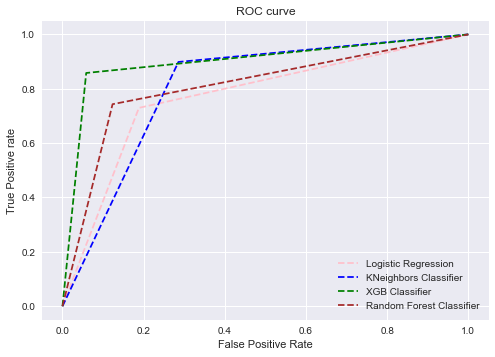

In [95]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(false_positive_rate1, true_positive_rate1, linestyle='--', color='pink', label='Logistic Regression')
plt.plot(false_positive_rate2, true_positive_rate2, linestyle='--', color='blue', label='KNeighbors Classifier')
plt.plot(false_positive_rate3, true_positive_rate3, linestyle='--',color='green', label='XGB Classifier')
plt.plot(false_positive_rate4, true_positive_rate4, linestyle='--',color='brown', label='Random Forest Classifier')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

XGB classifer has better precision, recall and f1 scores amongst all the models

In [96]:
#saving the model
XGB_classifier_auto= pickle.dumps(model3)